# **MODELLING (BENCHMARKING & HYPERPARAMETER TUNING)**

In [1]:
# Library
#Fund. Library
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

# Sampling
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTENC
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline

# Statistical Model
import statsmodels.api as sm

#Modelling and Evaluation
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score, cross_validate
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import (f1_score, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay)
from sklearn.metrics import RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay, roc_auc_score

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTENC

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_pre = pd.read_csv('data_hotel_booking_demand_prep4.csv')
df_prepa = pd.read_csv('data_hotel_booking_demand_prep3B.csv')
df_noScal = pd.read_csv('data_hotel_booking_demand_prep5.csv')
df_enc3 = pd.read_csv('data_hotel_booking_demand_prep6.csv')

In [3]:
display(df_pre.head(), df_enc3.head())

,previous_cancellations,booking_changes,days_in_waiting_list,total_of_special_requests,continent_Asia,continent_Europe,continent_South America,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,customer_type_Transient-Party,customer_type_Contract,reserved_room_type_A,reserved_room_type_D,required_car_parking_spaces_1,required_car_parking_spaces_2,required_car_parking_spaces_3,is_canceled
0,0.0,0.0,0.0,0.0,0,1,0,0,1,0,1,0,1,0,0,0,0,0
1,0.0,0.0,0.0,2.0,0,1,0,0,0,1,0,0,1,0,0,0,0,0
2,0.0,1.0,0.0,2.0,0,1,0,0,0,1,0,0,1,0,0,0,0,0
3,0.0,0.0,0.0,1.0,0,1,0,0,0,1,0,0,1,0,0,0,0,1
4,0.0,2.0,0.0,2.0,0,1,0,0,0,1,0,0,1,0,0,0,0,0


,previous_cancellations,booking_changes,total_of_special_requests,market_segment_Groups,market_segment_Others,deposit_type_Non Refund,customer_type_Transient,customer_type_Transient-Party,is_canceled
0,0.0,0.0,0.0,0,0,0,0,1,0
1,0.0,0.0,2.0,0,0,0,1,0,0
2,0.0,1.0,2.0,0,0,0,1,0,0
3,0.0,0.0,1.0,0,0,0,1,0,1
4,0.0,2.0,2.0,0,0,0,1,0,0


In [4]:
df_noScal.columns

Index(['previous_cancellations', 'booking_changes', 'days_in_waiting_list',
       'total_of_special_requests', 'market_segment_Groups',
       'market_segment_Offline TA/TO', 'market_segment_Online TA',
       'customer_type_Transient-Party', 'customer_type_Contract',
       'reserved_room_type_A', 'reserved_room_type_D',
       'required_car_parking_spaces_1', 'required_car_parking_spaces_2',
       'required_car_parking_spaces_3', 'is_canceled'],
      dtype='object')

In [5]:
pd.set_option('display.max_colwidth', 1)

# Unique values in each column
listItem = []
for col in df_pre.columns :
    listItem.append( [col, df_pre[col].nunique(), df_pre[col].unique()])

tabel1Desc = pd.DataFrame(columns=[['Column Name', 'Number of Unique', 'Unique Sample']],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,previous_cancellations,15,"[0.0, 1.0, 25.0, 2.0, 3.0, 11.0, 24.0, 13.0, 6.0, 26.0, 14.0, 4.0, 19.0, 5.0, 21.0]"
1,booking_changes,18,"[0.0, 1.0, 2.0, 5.0, 3.0, 4.0, 6.0, 7.0, 9.0, 8.0, 17.0, 10.0, 13.0, 12.0, 14.0, 16.0, 20.0, 15.0]"
2,days_in_waiting_list,113,"[0.0, 3.0, 39.0, 87.0, 77.0, 215.0, 97.0, 162.0, 46.0, 79.0, 4.0, 31.0, 122.0, 34.0, 57.0, 259.0, 50.0, 17.0, 32.0, 43.0, 75.0, 69.0, 44.0, 22.0, 113.0, 58.0, 38.0, 65.0, 48.0, 236.0, 176.0, 25.0, 108.0, 91.0, 19.0, 160.0, 68.0, 28.0, 63.0, 35.0, 42.0, 59.0, 24.0, 8.0, 183.0, 187.0, 21.0, 111.0, 56.0, 98.0, 101.0, 15.0, 16.0, 47.0, 93.0, 45.0, 14.0, 70.0, 10.0, 49.0, 178.0, 99.0, 60.0, 40.0, 85.0, 223.0, 6.0, 33.0, 20.0, 1.0, 41.0, 147.0, 55.0, 80.0, 150.0, 61.0, 330.0, 174.0, 107.0, 96.0, 18.0, 62.0, 13.0, 30.0, 120.0, 27.0, 207.0, 71.0, 2.0, 76.0, 125.0, 5.0, 9.0, 224.0, 53.0, 83.0, 84.0, 12.0, 73.0, 100.0, ...]"
3,total_of_special_requests,6,"[0.0, 2.0, 1.0, 3.0, 4.0, 5.0]"
4,continent_Asia,2,"[0, 1]"
5,continent_Europe,2,"[1, 0]"
6,continent_South America,2,"[0, 1]"
7,market_segment_Groups,2,"[0, 1]"
8,market_segment_Offline TA/TO,2,"[1, 0]"
9,market_segment_Online TA,2,"[0, 1]"


In [6]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83527 entries, 0 to 83526
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   previous_cancellations         83527 non-null  float64
 1   booking_changes                83527 non-null  float64
 2   days_in_waiting_list           83527 non-null  float64
 3   total_of_special_requests      83527 non-null  float64
 4   continent_Asia                 83527 non-null  int64  
 5   continent_Europe               83527 non-null  int64  
 6   continent_South America        83527 non-null  int64  
 7   market_segment_Groups          83527 non-null  int64  
 8   market_segment_Offline TA/TO   83527 non-null  int64  
 9   market_segment_Online TA       83527 non-null  int64  
 10  customer_type_Transient-Party  83527 non-null  int64  
 11  customer_type_Contract         83527 non-null  int64  
 12  reserved_room_type_A           83527 non-null 

## **Data Splitting**

In [7]:
# Data dipisahkan berdasarkan target

# Pemisahan data prepocessing tanpa metode binning
X = df_pre.drop(columns=['is_canceled'])
y = df_pre['is_canceled']

X_improv = df_enc3.drop(columns=['is_canceled'])
y_improv = df_enc3['is_canceled']

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X,
    y,
    stratify = y,
    test_size = 0.2,
    random_state = 10)

# Splitting hasil improvement
Xi_train_val, Xi_test, yi_train_val, yi_test = train_test_split(
    X_improv,
    y_improv,
    stratify = y,
    test_size = 0.2,
    random_state = 10)

Data dibagi menjadi data train dan test set dengan proporsi 80:20. Kemudian menggunakan stratify = y dalam kasus klasifikasi untuk proporsionalitas.

In [8]:
# Library
#Fund. Library
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Multicolineary checking
import dython as dy
from dython.nominal import associations

# Model
import pickle

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

#Modelling and Evaluation
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay, roc_auc_score


# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

## Model Based Feature Importance

---
## **MODELING & EVALUATION**
---

### Model Benchmarking

> Model yang digunakan dalam Benchmarking::

1. **Regresi Logistik**, adalah model statistik yang memanfaatkan fungsi logistik untuk memodelkan variabel terikat biner berdasarkan satu atau lebih variabel bebas. Outputnya adalah probabilitas bahwa titik input tertentu termasuk dalam kelas tertentu, yang diubah menjadi hasil biner melalui ambang batas (misalnya, jika probabilitas output lebih besar dari 0,5, klasifikasikan sebagai kelas 1, jika tidak, kelas 0)

1. **K-Nearest Neighbors**, adalah algoritme pembelajaran berbasis instans non-parametrik yang mengklasifikasikan titik data berdasarkan kelas mayoritas di antara K-nearest tetangganya dalam ruang fitur. Algoritme menghitung jarak antara titik data target dan semua titik lainnya, memilih K titik terdekat, dan menetapkan label kelas yang paling umum di antara tetangga titik target tersebut.

1. **Decision Tree**, membagi data menjadi beberapa subkumpulan berdasarkan nilai fitur masukan, membuat keputusan terpisah di setiap node berdasarkan nilai yang meminimalkan kriteria tertentu (misalnya, pengotor Gini atau entropi). Proses ini dilakukan secara rekursif, menghasilkan model keputusan seperti pohon, dimana setiap jalur dari akar pohon hingga daun mewakili jalur keputusan yang diakhiri dengan label kelas yang diprediksi.

1. **XGBoost**, adalah metode pembelajaran ansambel yang membangun beberapa pembelajar lemah, biasanya pohon keputusan, secara berurutan, di mana setiap pohon mencoba memperbaiki kesalahan yang dibuat oleh pohon sebelumnya. Ini menggunakan kerangka peningkatan gradien pada intinya, yang meminimalkan fungsi kerugian dengan menambahkan prediksi pohon baru ke dalam ansambel secara berulang.

1. **Peningkatan Gradien**, adalah teknik pembelajaran ansambel yang membangun serangkaian pembelajar lemah, biasanya pohon keputusan, yang setiap pohonnya mencoba memperbaiki kesalahan pohon sebelumnya secara berurutan. Ini meminimalkan fungsi kerugian dengan menambahkan prediksi pohon baru ke ansambel secara berulang, dipandu oleh gradien fungsi kerugian

1. **Random Forest**, adalah metode pembelajaran ansambel yang beroperasi dengan membangun beberapa pohon keputusan selama pelatihan dan mengeluarkan kelas yang merupakan mode kelas dari pohon individual untuk masalah klasifikasi, atau prediksi rata-rata pohon individu untuk regresi masalah. Dengan menggabungkan prediksi beberapa pohon keputusan, hal ini mengurangi overfitting dan memberikan akurasi yang lebih tinggi, menjadikannya algoritme pembelajaran mesin yang kuat dan serbaguna untuk berbagai skenario data.

1. **Adaptive Boosting**, merupakan teknik pembelajaran ansambel yang digunakan untuk meningkatkan kinerja prediksi dengan mengimbangi bobot pada setiap observasi, lebih memperhatikan observasi yang sulit dijadwalkan oleh model sebelumnya. Pengamatan prediksi yang salah mendapat bobot lebih besar, sehingga model berikutnya lebih fokus pada pengamatan yang sulit diatur.

Kita dapat melihat bahwa dataset tidak seimbang (mild imbalance) karena proporsi kelas minoritas sebesar 36.8% berada dalam rentang 20-40% dari dataset ([sumber](https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data)).\
Untuk mensiasati hal tersebut maka kita akan menerapkan metode resampling agar data kita memiliki distribusi kelas yang lebih seimbang.

Adapun metode yang akan dipakai adalah Synthetic Minority Over-sampling Technique for Nominal and Continuous (SMOTENC). Hal ini dikarenakan : 
- untuk menghindari terbuangnya data pada kelas mayoritas jika menggunakan undersampling sehingga dapat menghilangkan
informasi penting pada data tersebut. 
- untuk menghindari overfitting karena penduplikasian data yang telah ada sebelumnya sehingga pengklasifikasi terkena informasi yang sama jika menggunakan Random Oversampling.
- pada data kita terdapat fitur yang numerikal (continuous) and kategorikal (nominal).

In [9]:
df_pre.columns

Index(['previous_cancellations', 'booking_changes', 'days_in_waiting_list',
       'total_of_special_requests', 'continent_Asia', 'continent_Europe',
       'continent_South America', 'market_segment_Groups',
       'market_segment_Offline TA/TO', 'market_segment_Online TA',
       'customer_type_Transient-Party', 'customer_type_Contract',
       'reserved_room_type_A', 'reserved_room_type_D',
       'required_car_parking_spaces_1', 'required_car_parking_spaces_2',
       'required_car_parking_spaces_3', 'is_canceled'],
      dtype='object')

In [10]:
df_pre.shape[1]

18

In [11]:
# define oversampling 
resample = SMOTENC(random_state=10, categorical_features=[3]) #['continent', 'market_segment', ,'booking_changes','deposit_type', 'customer_type', 
                                                                                    # 'reserved_room_type']
       

### *MODEL BENCHMARKING - RESAMPLED METHODE* 

In [12]:
## Machine Learning Algorithm
logreg = LogisticRegression(random_state=10)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=10)
rf = RandomForestClassifier(random_state=10)
ada = AdaBoostClassifier(random_state=10)
grad = GradientBoostingClassifier(random_state=10)
xgb = XGBClassifier(random_state=10)
lgbm = LGBMClassifier(random_state=10)

# Define imbalance treatment methods
ros = RandomOverSampler(random_state=10)
rus = RandomUnderSampler(random_state=10)
smote = SMOTE(random_state=10)
near = NearMiss()
smoteen = SMOTEENN(random_state=10)
smotenc = SMOTENC(random_state=10, categorical_features=[3])

In [13]:
y_train_val.value_counts()

is_canceled
0    42229
1    24592
Name: count, dtype: int64

Pengaplikasian metode resampling dilakukan karena terdapat perbedaan proporsi antara churn (1) dan no-churn (0) dengan kondisi proporsi kelas minoritas (churn) <40%

Dalam tahapan benchmarking, kita akan mencari 2 model dengan performa terbaik. Dari 7 Model (Logistik Regression, KNN, Decition Tree, Random Forest, Ada Boosting, Gradient Boosting, dan XG Boosting) akan dilakukan 6 metode resampling (ROS, RUS, SMOTE, NearMiss, SMOTEEN, dan SMOTENC)juga tanpa menggunakan resampling. Jadi akan dijalankan 49 model dengan asumsi tersedianya waktu yang cukup untuk melakukannya

In [14]:
X_train_val.columns

Index(['previous_cancellations', 'booking_changes', 'days_in_waiting_list',
       'total_of_special_requests', 'continent_Asia', 'continent_Europe',
       'continent_South America', 'market_segment_Groups',
       'market_segment_Offline TA/TO', 'market_segment_Online TA',
       'customer_type_Transient-Party', 'customer_type_Contract',
       'reserved_room_type_A', 'reserved_room_type_D',
       'required_car_parking_spaces_1', 'required_car_parking_spaces_2',
       'required_car_parking_spaces_3'],
      dtype='object')

In [15]:
# # A dictionary containing models used
# models = {'KNN': knn,
#           'Logistic Regression':logreg,
#           'Decision Tree': tree,
#           'XGBoost' : xgb,
#           'Random Forest' : rf,
#           'Gradient Boosting' : grad,
#           'Ada Boosting' : ada,
#           'Lgbm' : lgbm
#           }

# # A dictionary containing resampling method used
# resamples = {
#     'none': None,
#     'ros': ros,
#     'rus': rus,
#     'smote': smote,
#     'near miss': near,
#     'smoteenn': smoteen,
#     'smotenc': smotenc,
# }

# # A dictionary containing metrics used
# metrics = {'balanced_accuracy': 'balanced_accuracy',
#            'precision': 'precision',
#            'recall': 'recall',
#            'f1': 'f1'}

# # List to store result
# test_accuracy_arr1 = []
# test_precision_arr1 = []
# test_recall_arr1 = []
# test_f1_arr1 = []
# list_model1 = []
# list_resample1 = []

# # Iterate over all models, resampling, and cross-validate method
# for name_resample,resample in resamples.items():
#     for name_model,model in models.items():
#         crossval = StratifiedKFold(n_splits=5)

#         if resample == None:
#             estimator = Pipeline([
#                 ('model', model),
#             ])
#         else:
#             estimator = Pipeline([
#                 ('resample', resample),
#                 ('model', model),
#             ])

#         list_model1.append(name_model)
#         list_resample1.append(name_resample)
#         scores = cross_validate(estimator, X_train_val, y_train_val, cv=crossval, scoring=metrics)
#         test_accuracy_arr1.append(scores['test_balanced_accuracy'].mean() * 100)
#         test_precision_arr1.append(scores['test_precision'].mean() * 100)
#         test_recall_arr1.append(scores['test_recall'].mean() * 100)
#         test_f1_arr1.append(scores['test_f1'].mean() * 100)

# # Create a dataframe for all of the benchmarking output
# model_bench = pd.DataFrame({
#     'model': list_model1,
#     'resample': list_resample1,
#     'accuracy': test_accuracy_arr1,
#     'precision': test_precision_arr1,
#     'recall': test_recall_arr1,
#     'F1': test_f1_arr1
# })

# model_bench

In [16]:
# # Menentukan path (lokasi) dan nama file CSV yang diinginkan
# file_csv1 = 'E:/Penyimpanan Utama (C)/Purwadhika Coding School/Orientasi/Modul 3/Github Caps M3/benchmark1.csv'

# # Menyimpan DataFrame ke dalam file CSV
# model_bench_perc1.to_csv(file_csv1, index=False)

# Import hasil model 2 kondisi
benchmark1 = pd.read_csv('benchmark1.csv')

In [17]:
benchmark1.sort_values('recall', ascending=False).head(10)

,model,resample,accuracy,precision,recall,F1
17,Logistic Regression,rus,70.588835,55.148363,78.232765,64.691971
9,Logistic Regression,ros,70.531575,55.109630,78.122976,64.628060
25,Logistic Regression,smote,70.568568,55.180787,78.061989,64.655771
49,Logistic Regression,smotenc,70.701560,55.546069,77.553638,64.727055
33,Logistic Regression,near miss,70.871578,58.991177,70.140700,64.083946
38,Ada Boosting,near miss,70.627992,59.638455,68.095350,63.585843
54,Ada Boosting,smotenc,72.343770,63.433305,67.273920,65.296187
14,Ada Boosting,ros,72.319306,63.475336,67.139738,65.254884
22,Ada Boosting,rus,72.332779,63.556624,67.062481,65.260799
30,Ada Boosting,smote,72.332258,63.563241,67.054340,65.259749


Dari tabel data hasil score recall dari 56 model, dipilih metode resampling rata-rata terbaik yang memberikan performa terbaik yaitu metode undersampling (rus) dan metode over sampling (ros)

### Trial 2 : Menghapus fitur continent

In [18]:
df_pre.columns

Index(['previous_cancellations', 'booking_changes', 'days_in_waiting_list',
       'total_of_special_requests', 'continent_Asia', 'continent_Europe',
       'continent_South America', 'market_segment_Groups',
       'market_segment_Offline TA/TO', 'market_segment_Online TA',
       'customer_type_Transient-Party', 'customer_type_Contract',
       'reserved_room_type_A', 'reserved_room_type_D',
       'required_car_parking_spaces_1', 'required_car_parking_spaces_2',
       'required_car_parking_spaces_3', 'is_canceled'],
      dtype='object')

In [19]:
feature = ['previous_cancellations','booking_changes','days_in_waiting_list','total_of_special_requests','market_segment_Groups','market_segment_Offline TA/TO',
           'market_segment_Online TA','customer_type_Transient-Party','customer_type_Contract','reserved_room_type_A', 'reserved_room_type_D','required_car_parking_spaces_1',
           'required_car_parking_spaces_2','required_car_parking_spaces_3','is_canceled']

In [20]:
df_noScal.head(1)

,previous_cancellations,booking_changes,days_in_waiting_list,total_of_special_requests,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,customer_type_Transient-Party,customer_type_Contract,reserved_room_type_A,reserved_room_type_D,required_car_parking_spaces_1,required_car_parking_spaces_2,required_car_parking_spaces_3,is_canceled
0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0


In [21]:
df_pre2 = df_pre[feature]
df_prenoScale = df_noScal[feature]
df_prenoScale.columns

Index(['previous_cancellations', 'booking_changes', 'days_in_waiting_list',
       'total_of_special_requests', 'market_segment_Groups',
       'market_segment_Offline TA/TO', 'market_segment_Online TA',
       'customer_type_Transient-Party', 'customer_type_Contract',
       'reserved_room_type_A', 'reserved_room_type_D',
       'required_car_parking_spaces_1', 'required_car_parking_spaces_2',
       'required_car_parking_spaces_3', 'is_canceled'],
      dtype='object')

In [22]:
# Data Splitting

# Pemisahan data prepocessing dengan penghapusan fitur country/continent
X2 = df_pre2.drop(columns=['is_canceled'])
y2 = df_pre2['is_canceled']

X2_train_val, X2_test, y2_train_val, y2_test = train_test_split(
    X2,
    y2,
    stratify = y,
    test_size = 0.2,
    random_state = 10)

# Pemisahan data numerik tanpa perlakukan scaling
X3 = df_prenoScale.drop(columns=['is_canceled'])
y3 = df_prenoScale['is_canceled']

X3_train_val, X3_test, y3_train_val, y3_test = train_test_split(
    X3,
    y3,
    stratify = y,
    test_size = 0.2,
    random_state = 10)

In [23]:
## Machine Learning Algorithm
logreg = LogisticRegression(random_state=10)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=10)
rf = RandomForestClassifier(random_state=10)
ada = AdaBoostClassifier(random_state=10)
grad = GradientBoostingClassifier(random_state=10)
xgb = XGBClassifier(random_state=10)
lgbm = LGBMClassifier(random_state=10)

# Define imbalance treatment methods
ros = RandomOverSampler(random_state=10)
rus = RandomUnderSampler(random_state=10)
smote = SMOTE(random_state=10)
near = NearMiss()
smoteen = SMOTEENN(random_state=10)
smotenc = SMOTENC(random_state=10, categorical_features=[4])

In [24]:
# # A dictionary containing models used
# models = {'KNN': knn,
#           'Logistic Regression':logreg,
#           'Decision Tree': tree,
#           'XGBoost' : xgb,
#           'Random Forest' : rf,
#           'Gradient Boosting' : grad,
#           'Ada Boosting' : ada,
#           'Lgbm' : lgbm
#           }

# # A dictionary containing resampling method used
# resamples = {
#     'none': None,
#     'ros': ros,
#     'rus': rus,
#     'smote': smote,
#     'near miss': near,
#     'smoteenn': smoteen,
#     'smotenc': smotenc,
# }

# # A dictionary containing metrics used
# metrics = {'balanced_accuracy': 'balanced_accuracy',
#            'precision': 'precision',
#            'recall': 'recall',
#            'f1': 'f1'}

# # List to store result
# test_accuracy_arr2 = []
# test_precision_arr2 = []
# test_recall_arr2 = []
# test_f1_arr2 = []
# list_model2 = []
# list_resample2 = []

# # Iterate over all models, resampling, and cross-validate method
# for name_resample,resample in resamples.items():
#     for name_model,model in models.items():
#         crossval = StratifiedKFold(n_splits=5)

#         if resample == None:
#             estimator = Pipeline([
#                 ('model', model),
#             ])
#         else:
#             estimator = Pipeline([
#                 ('resample', resample),
#                 ('model', model),
#             ])

#         list_model2.append(name_model)
#         list_resample2.append(name_resample)
#         scores = cross_validate(estimator, X2_train_val, y2_train_val, cv=crossval, scoring=metrics)
#         test_accuracy_arr2.append(scores['test_balanced_accuracy'].mean() * 100)
#         test_precision_arr2.append(scores['test_precision'].mean() * 100)
#         test_recall_arr2.append(scores['test_recall'].mean() * 100)
#         test_f1_arr2.append(scores['test_f1'].mean() * 100)

# # Create a dataframe for all of the benchmarking output
# model_bench2 = pd.DataFrame({
#     'model': list_model2,
#     'resample': list_resample2,
#     'accuracy': test_accuracy_arr2,
#     'precision': test_precision_arr2,
#     'recall': test_recall_arr1,
#     'F1': test_f1_arr1
# })

# model_bench2

In [25]:
# # Menentukan path (lokasi) dan nama file CSV yang diinginkan
# file_csv2 = 'E:/Penyimpanan Utama (C)/Purwadhika Coding School/Orientasi/Modul 3/Github Caps M3/benchmark2.csv'

# # Menyimpan DataFrame ke dalam file CSV
# model_bench_perc2.to_csv(file_csv2, index=False)

# Import hasil model 2 kondisi
benchmark2 = pd.read_csv('benchmark2.csv')

In [26]:
benchmark2.sort_values('recall', ascending=False).head(10)

,model,resample,accuracy,precision,recall,F1
9,Logistic Regression,ros,70.418573,54.552578,79.322538,64.645740
17,Logistic Regression,rus,70.484707,54.642018,79.310348,64.704049
49,Logistic Regression,smotenc,70.458151,54.870034,78.553950,64.602455
25,Logistic Regression,smote,70.483305,54.923014,78.492962,64.619717
33,Logistic Regression,near miss,71.046862,59.901984,68.989926,64.124338
38,Ada Boosting,near miss,70.869186,60.410658,67.509766,63.760024
14,Ada Boosting,ros,72.334199,63.496016,67.160055,65.273794
22,Ada Boosting,rus,72.400676,63.644470,67.143809,65.343881
30,Ada Boosting,smote,72.378482,63.621004,67.111265,65.316522
54,Ada Boosting,smotenc,72.368564,63.696998,66.973026,65.290340


### Trial 3 : Pengaplikasian Feature Selection

In [27]:
Xi_train_val.columns

Index(['previous_cancellations', 'booking_changes',
       'total_of_special_requests', 'market_segment_Groups',
       'market_segment_Others', 'deposit_type_Non Refund',
       'customer_type_Transient', 'customer_type_Transient-Party'],
      dtype='object')

In [28]:
# # A dictionary containing models used
# models = {'KNN': knn,
#           'Logistic Regression':logreg,
#           'Decision Tree': tree,
#           'XGBoost' : xgb,
#           'Random Forest' : rf,
#           'Gradient Boosting' : grad,
#           'Ada Boosting' : ada,
#           'Lgbm' : lgbm
#           }

# # A dictionary containing resampling method used
# resamples = {
#     'none': None,
#     'ros': ros,
#     'rus': rus,
#     'smote': smote,
#     'near miss': near,
#     'smoteenn': smoteen,
#     'smotenc': smotenc,
# }

# # A dictionary containing metrics used
# metrics = {'balanced_accuracy': 'balanced_accuracy',
#            'precision': 'precision',
#            'recall': 'recall',
#            'f1': 'f1'}

# # List to store result
# test_accuracy3 = []
# test_precision3 = []
# test_recall3 = []
# test_f13 = []
# list_model3 = []
# list_resample3 = []

# # Iterate over all models, resampling, and cross-validate method
# for name_resample,resample in resamples.items():
#     for name_model,model in models.items():
#         crossval = StratifiedKFold(n_splits=5)

#         if resample == None:
#             estimator = Pipeline([
#                 ('model', model),
#             ])
#         else:
#             estimator = Pipeline([
#                 ('resample', resample),
#                 ('model', model),
#             ])

#         list_model3.append(name_model)
#         list_resample3.append(name_resample)
#         scores = cross_validate(estimator, Xi_train_val, yi_train_val, cv=crossval, scoring=metrics)
#         test_accuracy3.append(scores['test_balanced_accuracy'].mean() * 100)
#         test_precision3.append(scores['test_precision'].mean() * 100)
#         test_recall3.append(scores['test_recall'].mean() * 100)
#         test_f13.append(scores['test_f1'].mean() * 100)

# # Create a dataframe for all of the benchmarking output
# model_bench3 = pd.DataFrame({
#     'model': list_model3,
#     'resample': list_resample3,
#     'accuracy': test_accuracy3,
#     'precision': test_precision3,
#     'recall': test_recall3,
#     'F1': test_f13
# })

# model_bench3

In [29]:
# # Menentukan path (lokasi) dan nama file CSV yang diinginkan
# file_csv3 = 'E:/Penyimpanan Utama (C)/Purwadhika Coding School/Orientasi/Modul 3/Github Caps M3/benchmark3.csv'

# # Menyimpan DataFrame ke dalam file CSV
# model_bench3.to_csv(file_csv3, index=False)

# Import hasil model 2 kondisi
benchmark3 = pd.read_csv('benchmark3.csv')

In [30]:
benchmark3.sort_values('recall', ascending=False).head(10)

,model,resample,accuracy,precision,recall,F1
38,Ada Boosting,near miss,72.596511,66.889917,63.500342,65.149514
36,Random Forest,near miss,71.917818,65.367629,63.402759,64.367782
34,Decision Tree,near miss,71.882787,65.302692,63.382424,64.325770
35,XGBoost,near miss,72.450216,66.692897,63.321427,64.960999
39,Lgbm,near miss,72.642342,67.185336,63.288898,65.177383
20,Random Forest,rus,72.939826,68.148677,63.040846,65.493595
19,XGBoost,rus,72.985823,68.277059,63.028646,65.546110
51,XGBoost,smotenc,72.963998,68.228935,63.020515,65.519554
30,Ada Boosting,smote,72.788574,67.798961,63.008299,65.312746
18,Decision Tree,rus,72.946392,68.199544,63.004248,65.497174


Dari ketiga trial process diatas, akan diterapkan kondisi trial kedua dimana digunakan fitur-fitur hasil feature engineering (Berbasis VIF analisis), penghapusan binning others, dan dropping feature country/continent agar menghasilkan performa yang baik terhadap matrix recall.

In [31]:
rus1 = RandomUnderSampler(sampling_strategy='majority', random_state=10)
ros1 = RandomOverSampler(sampling_strategy='not majority', random_state=10)

# Stratified cross validation
skf = StratifiedKFold(n_splits = 5)

### *MODEL BENCHMARKING - DEFAULT HYPERPARAMETER : CROSS VALIDATION* 

#### *MODEL BENCHMARKING - RESAMPLING : RUS & ROS* 

In [32]:
models = [logreg, knn, tree, rf, ada, grad, xgb, lgbm]

list_mean_rus1 = []
list_std_rus1 = []
list_mean_ros1 = []
list_std_ros1 = []
list_mean_without_sampling = []
list_std_without_sampling = []

for model in  models :

    # modeling with undersampling (rus)
    pipe_model_rus1 = Pipeline([
        ('resample', rus1),
        ('algo', model)
    ])

    model_cv_rus1 = cross_val_score(
        estimator = pipe_model_rus1,
        X = X2_train_val,
        y = y2_train_val,
        cv = skf,
        scoring = 'recall',
        n_jobs = -1
    )
    list_mean_rus1.append(model_cv_rus1.mean())
    list_std_rus1.append(model_cv_rus1.std())

    # modeling with Oversampling (ros)

    pipe_model_ros1 = Pipeline([
        ('resample', ros1),
        ('algo', model)
    ])

    model_cv_ros1 = cross_val_score(
        estimator = pipe_model_ros1,
        X = X2_train_val,
        y = y2_train_val,
        cv = skf,
        scoring = 'recall',
        n_jobs = -1
    )
    list_mean_ros1.append(model_cv_ros1.mean())
    list_std_ros1.append(model_cv_ros1.std())

    # modeling without oversampling

    pipe_model_without_sampling = Pipeline([
        ('algo', model)
    ])

    model_cv_without_sampling = cross_val_score(
        estimator = pipe_model_without_sampling,
        X = X2_train_val,
        y = y2_train_val,
        cv = skf,
        scoring = 'recall',
        n_jobs = -1
    )
    list_mean_without_sampling.append(model_cv_without_sampling.mean())
    list_std_without_sampling.append(model_cv_without_sampling.std())

In [33]:
pd.DataFrame({
    'model' : ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'GradienBoost', 'XGBoost', 'LightGBM'],
    'mean_recall_without_sampling' : list_mean_without_sampling,
    'mean_recall_ros' : list_mean_ros1,
    'mean_recall_rus' : list_mean_rus1,
    'std_recall_without_sampling' : list_std_without_sampling,
    'std_recall_ros' : list_std_ros1,
    'std_recall_rus' : list_std_rus1 
}).sort_values('mean_recall_rus', ascending=False)

,model,mean_recall_without_sampling,mean_recall_ros,mean_recall_rus,std_recall_without_sampling,std_recall_ros,std_recall_rus
0,Logistic Regression,0.533548,0.792046,0.793144,0.003994,0.001585,0.004314
4,AdaBoost,0.538509,0.671601,0.671438,0.004396,0.003800,0.005280
3,Random Forest,0.542778,0.638907,0.641347,0.005772,0.008035,0.007980
2,Decision Tree,0.542412,0.637809,0.639761,0.005357,0.007596,0.007523
6,XGBoost,0.543063,0.638216,0.636833,0.005366,0.008767,0.009059
5,GradienBoost,0.536679,0.626911,0.633620,0.005506,0.002462,0.014759
7,LightGBM,0.541192,0.630652,0.632279,0.006030,0.005950,0.006600
1,KNN,0.571454,0.513629,0.162655,0.128505,0.100803,0.003358


1. Model terbaik ketika diaplikasikan metode under sampling rus dan resampling over sampling ros dengan parameter default yaitu Logistic Regression yang mengalami kenaikan dari sisi Matriks Recall 25.3%.
1. Model yang paling robust yaitu model Logistic Regression juga dilihat dari nilai STD yang terkecil.
1. Secara umum, pengaplikasian metode resampling rus menghasilkan performa lebih maksimal dibandingkan ros (0.1% lebih baik dari sisi recall)

In [34]:
model_conf = [
    ('Logistic Regression', logreg),
    ('AdaBoost ', ada)
]

resample_conf = [
    ('none', None),
    ('ROS', ros),
    ('RUS', rus)
]

# List to store results
metrics = []
conf_matrix = []

# Iterate over both models and resampling methods
for name_model, model in model_conf:
    for name_resample, resample in resample_conf:

        if resample == None:
            pipeline_conf = Pipeline([
                ('model', model),
            ])
        else:
            pipeline_conf = Pipeline([
                ('resample', resample),
                ('model', model),
            ])  

        pipeline_conf.fit(X2_train_val, y2_train_val)
        y_pred = pipeline_conf.predict(X2_test)

        metrics.append([
            recall_score(y2_test, y_pred) * 100,
            accuracy_score(y2_test, y_pred) * 100,
            precision_score(y2_test, y_pred) * 100,
            f1_score(y2_test, y_pred) * 100
        ])

        conf_matrix.append(confusion_matrix(y2_test, y_pred))

# Create a DataFrame to display the metrics
index_names = [f'{name_model}_{name_resample}' for name_model, _ in model_conf for name_resample, _ in resample_conf]
df_metrics = pd.DataFrame(metrics, columns=['Recall','Accuracy', 'Precision', 'F1'], index=index_names)


df_metrics.sort_values('Recall', ascending=False) # Display Resample Result, Sort by recall

,Recall,Accuracy,Precision,F1
Logistic Regression_RUS,78.854912,68.394589,54.916176,64.743590
Logistic Regression_ROS,78.708523,68.538250,55.076258,64.805143
AdaBoost _ROS,66.525699,74.141027,64.389169,65.440000
AdaBoost _RUS,66.525699,74.099126,64.318289,65.403374
AdaBoost _none,53.513338,76.840656,76.493839,62.972533
Logistic Regression_none,53.269356,76.445588,75.513027,62.470196


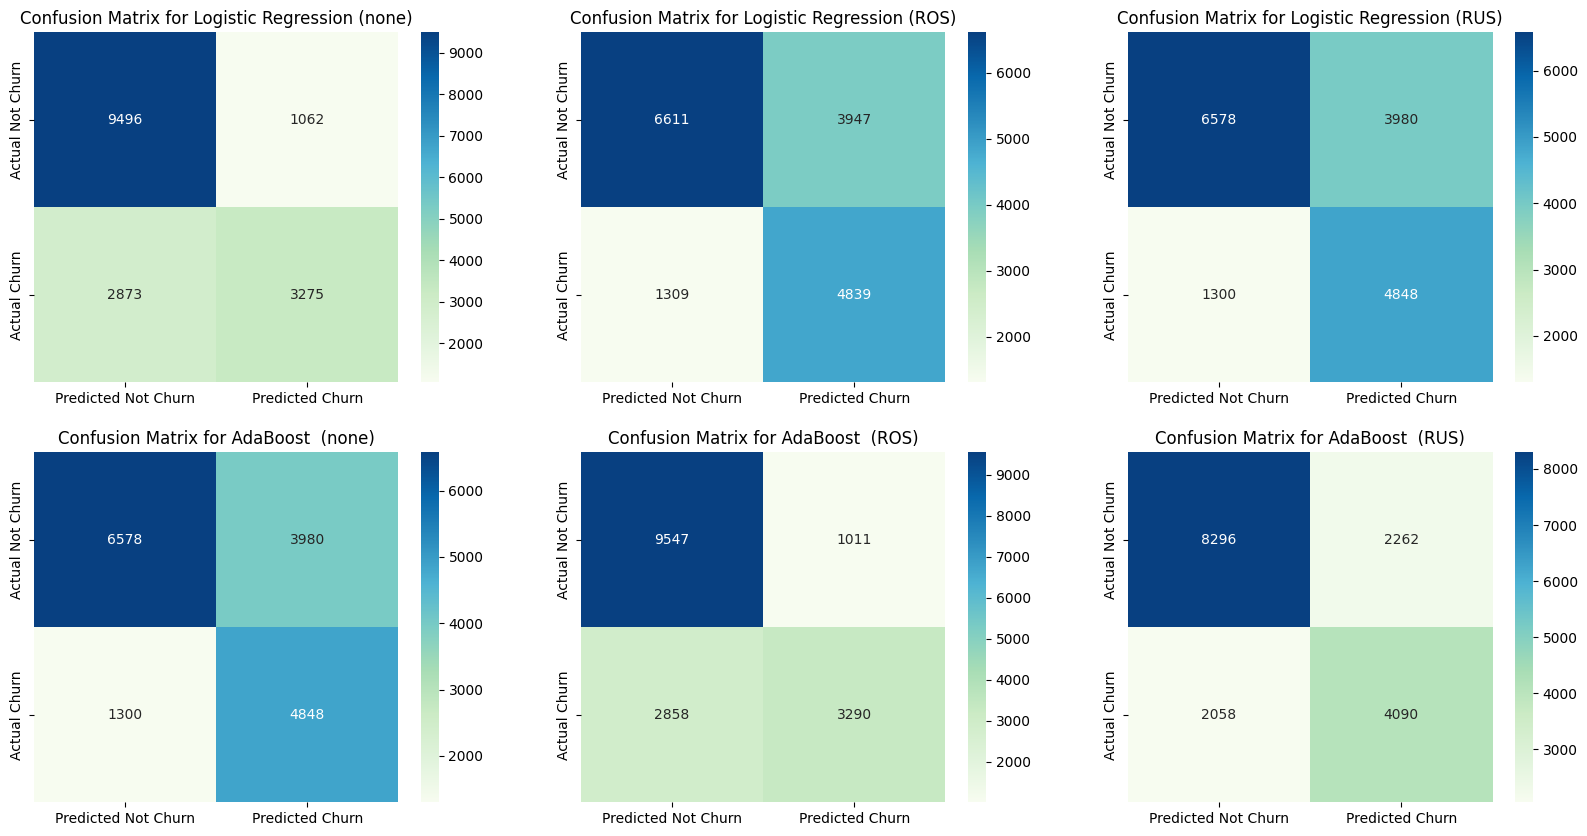

In [35]:
# Display the confusion matrix for models
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for i, (model_name, _) in enumerate(model_conf):
    for j, (resample_name, _) in enumerate(resample_conf):
        sns.heatmap(conf_matrix[2*i + j], annot=True, fmt='d', cmap='GnBu',
                    xticklabels=['Predicted Not Churn', 'Predicted Churn'],
                    yticklabels=['Actual Not Churn', 'Actual Churn'], ax=axes[i][j])
        axes[i][j].set_title(f"Confusion Matrix for {model_name} ({resample_name})");



Insight: (Kondisi diatas merupakan hasil dari model pada dataset train)
1. Pada model logistic regression dan adaboost yang belum diberikan perlakukan resampling, nilai recall masing-masing sebesar (52.37% dan 53.51%). Pada default parameter dan dalam kondisi yang sama (random state = 10), model adaboost lebih baik dibandingkan model logistic regression
1. Setelah diberi perlakukan resampling baik metode rus dan ros, nilai recall naik secara umum +25.5%, artinya proporsi FN (False Negative, tamu yang diprediksi tidak membatalkan pesanan aktualnya membatalkan) semakin berkurang dan proporsi TP (True Positive, tepat memprediksi tamu yang membatalkan pesanan) akan semakin meningkat.
1. Pada default parameter dan random state yang sama, metode rus lebih baik dibandingkan ros (selisih 0.15% recall score-nya). Sehingga dipilih metode resampling rus untuk dilakukan hyperparameter tuning

### *MODEL BENCHMARKING- DEFAULT HYPERPARAMETER : TRAIN & TEST DATA*

In [36]:
models = [logreg, knn, tree, rf, ada, grad, xgb, lgbm]
score_recall_test = []
score_recall_train = []

def y_pred_func(model):
    estimator = Pipeline([
        ('resample', rus1),
        ('algo', model)
    ])
    estimator.fit(X2_train_val,y2_train_val)
    return estimator

for model in models:
    estimator = y_pred_func(model)
    y_pred_test = estimator.predict(X2_test)
    y_pred_train = estimator.predict(X2_train_val)
    score_recall_test.append(recall_score(y2_test,y_pred_test))
    score_recall_train.append(recall_score(y2_train_val,y_pred_train))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 24592, number of negative: 24592
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003446 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 134
[LightGBM] [Info] Number of data points in the train set: 49184, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [37]:
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'GradienBoost', 'XGBoost', 'LightGBM'],
             'recall score (train set)': score_recall_train,
             'recall score (validation set)': list_mean_rus1,
             'recall score (test set)': score_recall_test}).set_index('model').sort_values(by='recall score (test set)',ascending=False)

,recall score (train set),recall score (validation set),recall score (test set)
model,,,
Logistic Regression,0.792046,0.793144,0.788549
AdaBoost,0.669039,0.671438,0.665257
XGBoost,0.648666,0.636833,0.649154
Random Forest,0.645738,0.641347,0.644275
Decision Tree,0.643624,0.639761,0.641672
LightGBM,0.629432,0.632279,0.627684
GradienBoost,0.625732,0.633620,0.624105
KNN,0.164159,0.162655,0.161679


Terlihat bahwa model AdaBoost merupakan model terbaik untuk Explainable ML dan Logistic Regression merupakan model terbaik untuk Interpretable ML. Keduanya  memiliki hasil recall score yang baik dan cukup stabil baik pada train set maupun test set. Artinya kedua model setelah dilakukan tuning pada salah satu hyperparameternya mampu meminimalisir jumlah pelanggan yang aktualnya churn tetapi diprediksi tidak akan churn (False Negatif) dengan lebih baik.

Adapun untuk model KNN cenderung mengalami underfitting dimana model memiliki performa yang sangat buruk pada training dan test set (recall score mendekati 0).

Oleh sebab itu kita akan jadikan Logistic Regression dan AdaBoost sebagai benchmark model kita.

Sekarang mari kita coba lakukan hyperparameter tuning pada kedua model tersebut untuk mendapatkan hasil yang lebih baik lagi.

### *HYPERPARAMETER TUNING : LOGISTIC REGRESSION*

## *Grid Search Tuning*
Saat menyempurnakan model `Logistic Regression`, akan disesuaikan beberapa pengaturan untuk mengoptimalkan kinerjanya:

1. **Penalty**: Ini seperti menetapkan aturan main untuk model. Hal ini membantu menjaga model agar tidak terlalu fokus pada data pelatihan dan tidak melakukan generalisasi dengan baik pada data baru yang tidak terlihat.

2. **C**: Nilai yang lebih kecil berarti aturan yang lebih ketat, yang membantu memastikan model tidak menjadi terlalu rumit dan berlebihan.

3. **Solver**: metode yang digunakan model untuk menemukan cara terbaik agar sesuai dengan data. Ini seperti memilih jalur untuk memecahkan labirin, di mana beberapa jalur lebih cepat atau lebih efisien.

4. **Max_iter**: batas jumlah upaya yang harus dilakukan model untuk menemukan jalur terbaik.

Untuk metode penyetelan, akan digunakan `Grid Search`:

- Mencoba setiap kombinasi pengaturan yang dipertimbangkan untuk menemukan yang terbaik. Pendekatan ini menyeluruh tetapi memerlukan lebih banyak waktu dan daya komputasi.
- We're using `Grid Search` because our data isn't excessively large, which allows us to be thorough without being overly costly, leading to more accurate and trustworthy settings for our model.
Penggunaan `Grid Search` karena data tidak terlalu besar, sehingga memungkinkan dilakukannya penelusuran secara menyeluruh tanpa memerlukan biaya yang terlalu besar, sehingga menghasilkan pengaturan yang lebih akurat dan dapat dipercaya untuk model yang ditandai dengan meningkatnya nilai recall.

### Parameter max_iter : Logistic Regression

In [38]:
hyperparam_maxiter = np.arange(1,51)

training_recall = []
testing_recall = []
score = np.Infinity

for i in hyperparam_maxiter:
    logreg = LogisticRegression(max_iter = i, random_state=10)
    rus1 = RandomUnderSampler(sampling_strategy='majority', random_state=10)
    
    pipeline = Pipeline([
        ('resample', rus1),
        ('model', logreg)
    ])

    pipeline.fit(X3_train_val, y3_train_val)

    # predict in train set
    y_pred_train = pipeline.predict(X3_train_val)
    recall_train = recall_score(y3_train_val, y_pred_train)
    training_recall.append(recall_train)

    # predict in test set
    y_pred_test = pipeline.predict(X3_test)
    recall_test = recall_score(y3_test, y_pred_test)
    testing_recall.append(recall_test)

    if recall_test > score:
        score = recall_test
        best_maxIter = i


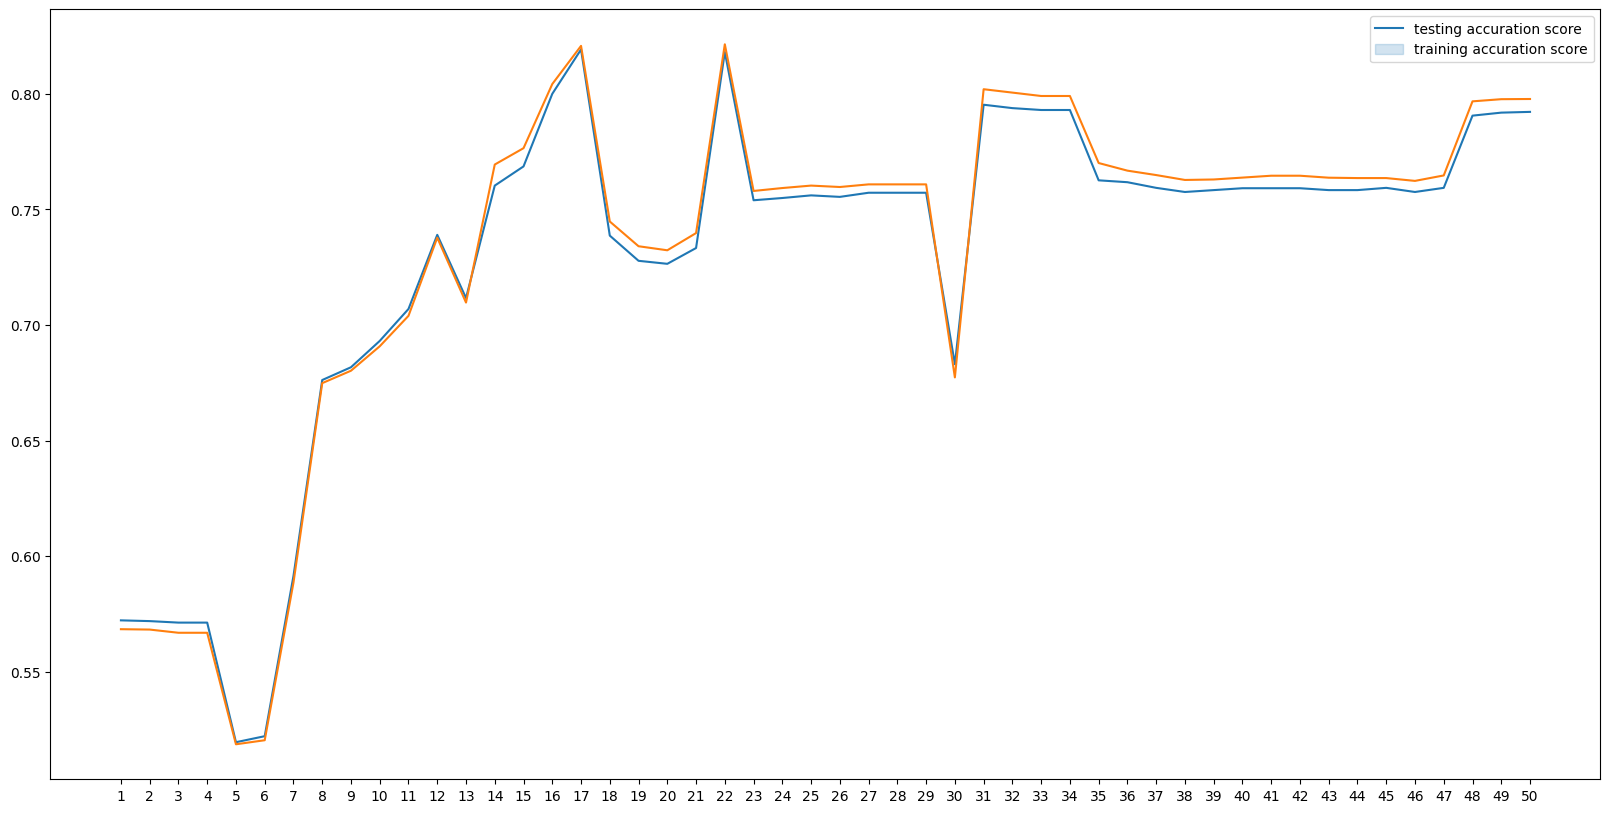

In [39]:
length = range(len(hyperparam_maxiter))

plt.figure(figsize = (20,10))
sns.lineplot(x=length,y=testing_recall)
sns.lineplot(x=length,y=training_recall)
plt.legend(['testing accuration score','training accuration score'])
plt.xticks(length,hyperparam_maxiter)
plt.show()

In [40]:
maxim = max(testing_recall)
indeks_best = testing_recall.index(maxim)
display(maxim, indeks_best)

0.819128171763175

16

#### Parameter C : Logistic Regression

In [41]:
hyperparam_c = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

training_recall = []
testing_recall = []
score = np.Infinity

for i in hyperparam_c:
    logreg = LogisticRegression(C = i, random_state=10)
    rus1 = RandomUnderSampler(sampling_strategy='majority', random_state=10)
    
    pipeline = Pipeline([
        ('resample', rus1),
        ('model', logreg)
    ])

    pipeline.fit(X3_train_val, y3_train_val)
    y_predict_train = logreg.predict(X3_train_val)
    recall_train = recall_score(y3_train_val,y_predict_train)
    training_recall.append(recall_train)
    
    y_predict_test = logreg.predict(X3_test)
    recall_test = recall_score(y3_test,y_predict_test)
    testing_recall.append(recall_test)

    if score < recall_test:
       score = recall_test
       best_c = i

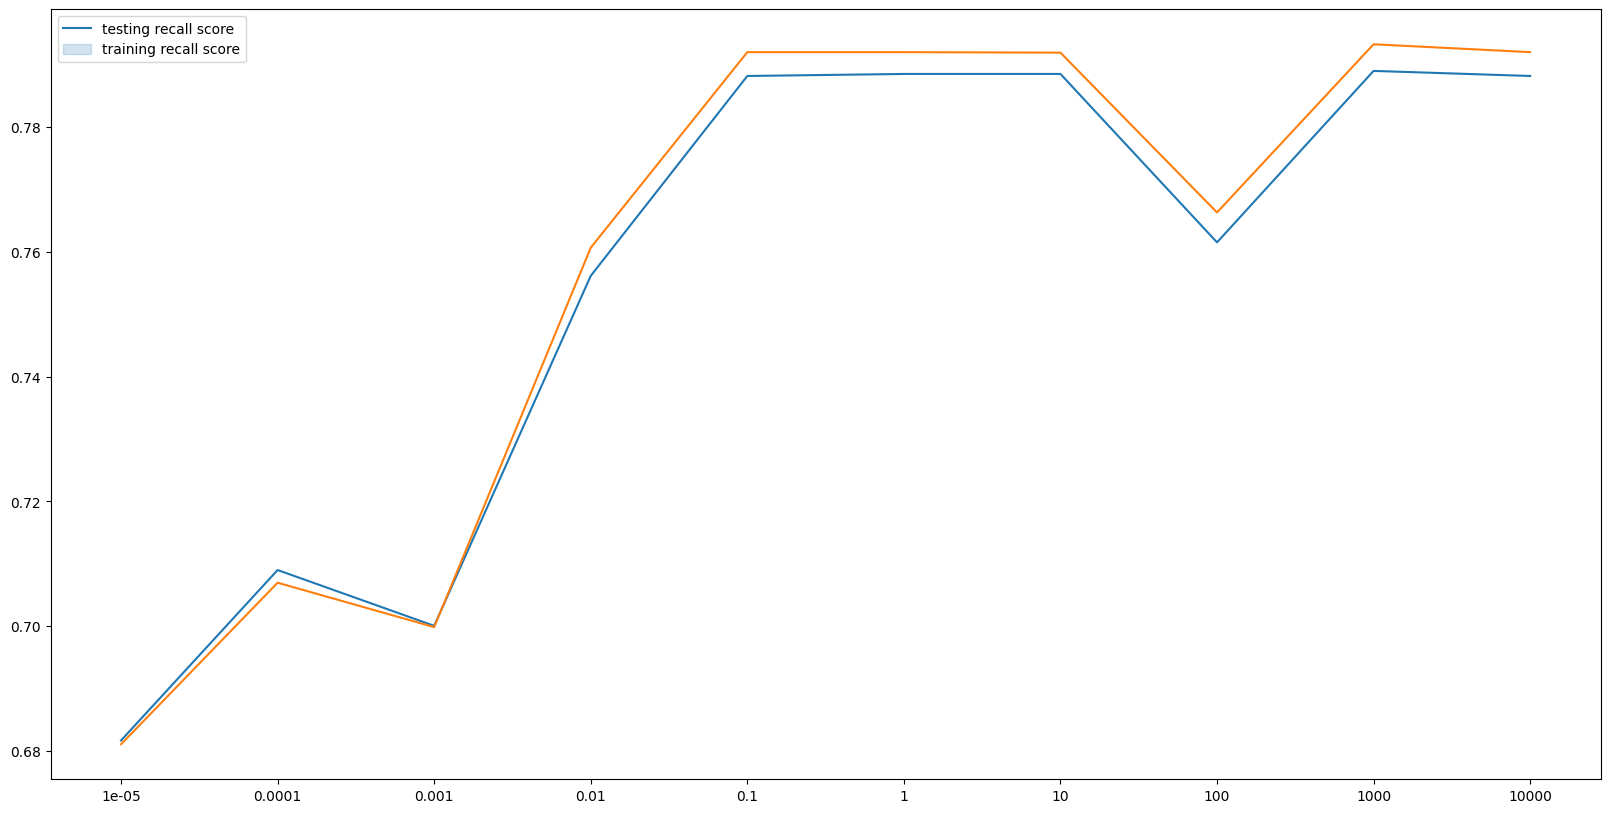

In [42]:
length = range(len(hyperparam_c))

plt.figure(figsize = (20,10))
sns.lineplot(x=length,y=testing_recall)
sns.lineplot(x=length,y=training_recall)
plt.legend(['testing recall score','training recall score'])
plt.xticks(length,hyperparam_c)
plt.show()

In [43]:
maxim = max(testing_recall)
indeks_best = testing_recall.index(maxim)
display(maxim, indeks_best)

0.7890370852309694

8

Berdasarkan analisis dari 2 parameter pada model logistic regression, didapati parameter potensial untuk mendapatkan hasil yang maksimal (sweat spot) yaitu berkisar 20,40,60,80,100 untuk max_iter dan 0.0001,0.001, 0.01,0.1, dan 1.

In [44]:
# # Define Hyperparameter space 

# hyperparam_space = {
#     'model__penalty': ['l1', 'l2', 'elastic-net', None],
#     'model__C': [0.00001, 0.0001, 0.001, 0.01, 0.1],
#     'model__solver': ['lbfgs','newton-cg','saga','liblinear','newton-cholesky'],     # Pemilihan ketiga parameter ini dikarenakan efektifitas kinerja pada dataset besar
#     'model__max_iter': [1,2,3,4,5,6,7,8,9,10,100]
# }

# logreg = LogisticRegression(random_state=10)
# rus = RandomUnderSampler(random_state=10)

# pipe_model = Pipeline([
#     ('resampling', rus),
#     ('model', logreg)
# ])

# # Define the grid search
# gridsearch_logreg = GridSearchCV(
#     estimator=pipe_model,
#     param_grid=hyperparam_space,  # hyperparameter space
#     cv=StratifiedKFold(n_splits=5),  # cross-validation scheme 
#     scoring = 'recall',   # evaluation metrics
#     n_jobs = -1   # To speed up the process by utilizing multiple cores of the machine
# )

# gridsearch_logreg.fit(X2_train_val, y2_train_val)


In [45]:
# # Model Pickling
# # Hyperparameter tuning logistic regression model
# # gridsearch_logreg.fit(X2_train_val, y2_train_val)
# filename = 'LogRegHyperTuning.pkl'
# pickle.dump(gridsearch_logreg,open(filename,'wb'))

# load model
filename = 'LogRegHyperTuning.pkl'
gridsearch_logreg = pickle.load(open(filename,'rb'))
# gridsearch_logreg.fit(X2_train_val, y2_train_val)

In [46]:
# Showing the chosen parameters details by the Grid Search based on Train dataset
print('Best Hyperparameters: ', gridsearch_logreg.best_params_)
print('Best Score: ', gridsearch_logreg.best_score_)

Best Hyperparameters:  {'model__C': 0.01, 'model__max_iter': 3, 'model__penalty': 'l1', 'model__solver': 'liblinear'}
Best Score:  0.8235196188832491


Hyperparameter terbaik model Logistic Regression dari hasil GridSearchCV => `C` = 0.01, `max_iter` = 3, `penalty` = l1, dan `solver` = liblinear dengan recall score 0.82. Nilai ini memiliki perbedaan

In [47]:
pd.DataFrame(gridsearch_logreg.cv_results_).sort_values('rank_test_score').head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,param_model__max_iter,param_model__penalty,param_model__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
703,0.252714,0.037586,0.031889,0.012815,0.01,3,l1,liblinear,"{'model__C': 0.01, 'model__max_iter': 3, 'model__penalty': 'l1', 'model__solver': 'liblinear'}",0.823745,0.828827,0.824725,0.823709,0.816592,0.823520,0.003942,1
723,0.340655,0.083186,0.035140,0.003465,0.01,4,l1,liblinear,"{'model__C': 0.01, 'model__max_iter': 4, 'model__penalty': 'l1', 'model__solver': 'liblinear'}",0.824761,0.817036,0.793819,0.825336,0.818625,0.815915,0.011523,2
683,0.261796,0.048341,0.034446,0.006578,0.01,2,l1,liblinear,"{'model__C': 0.01, 'model__max_iter': 2, 'model__penalty': 'l1', 'model__solver': 'liblinear'}",0.810734,0.815613,0.808865,0.809882,0.804799,0.809979,0.003476,3
688,0.395703,0.080290,0.033538,0.006741,0.01,2,l2,liblinear,"{'model__C': 0.01, 'model__max_iter': 2, 'model__penalty': 'l2', 'model__solver': 'liblinear'}",0.808091,0.805652,0.806832,0.800732,0.800325,0.804326,0.003198,4
903,0.280292,0.037134,0.030002,0.005067,0.1,2,l1,liblinear,"{'model__C': 0.1, 'model__max_iter': 2, 'model__penalty': 'l1', 'model__solver': 'liblinear'}",0.775158,0.776987,0.806425,0.807849,0.802562,0.793796,0.014586,5


Dari tabel di atas, kita dapat melihat bahwa 4 rata-rata skor recall tertinggi didominasi oleh hyperparameter `C` sebesar 0.01 dan `penalty` dan `solver` didominasi oleh l1 dan liblinear. Sedangkan `max_iter` masih cukup bervariasi antara 2,3, dan 4. Hal tersebut menunjukkan bahwa skor recall yang tinggi lebih dipengaruhi oleh `C`,`penalty` dan `solver` pada model Logistic Regression.

Selanjutnya mari kita coba predict ke test set.

In [48]:
# Assigning the best model GridSearchCV
logreg_pamTuning = gridsearch_logreg.best_estimator_
logreg_pamTuning.fit(X2_train_val, y2_train_val)

Pipeline(steps=[('resampling', RandomUnderSampler(random_state=10)),
                ('model',
                 LogisticRegression(C=0.01, max_iter=3, penalty='l1',
                                    random_state=10, solver='liblinear'))])

In [49]:
# Predict the test dataset using the best model from grid search process
y_pred_logreg_pamTuning = logreg_pamTuning.predict(X2_test)

accuracy_logreg_pamTuning = accuracy_score(y2_test, y_pred_logreg_pamTuning) * 100
precision_logreg_pamTuning = precision_score(y2_test, y_pred_logreg_pamTuning) * 100
recall_logreg_pamTuning = recall_score(y2_test, y_pred_logreg_pamTuning) * 100
f1_logreg_pamTuning = f1_score(y2_test, y_pred_logreg_pamTuning) * 100


logreg_after_pamTuning = pd.DataFrame({'Recall': recall_logreg_pamTuning,
                                    'Accuracy': accuracy_logreg_pamTuning,
                                   'Precision': precision_logreg_pamTuning,
                                  'F1': f1_logreg_pamTuning}, index=['Logistic Regression After Parameter Tuning'])

# Display the metrics for the Grid Search
df_metrics = df_metrics.rename(index={'Logistic Regression_RUS': 'Logistic Regression before Parameter Tuning'})
df_metrics = df_metrics.loc[['Logistic Regression before Parameter Tuning']]

df_metrics_tuning = pd.concat([logreg_after_pamTuning, df_metrics])
df_metrics_tuning

,Recall,Accuracy,Precision,F1
Logistic Regression After Parameter Tuning,82.108003,65.377709,51.870119,63.576826
Logistic Regression before Parameter Tuning,78.854912,68.394589,54.916176,64.743590


> Berdasarkan tabel di atas, terdapat peningkatan pada skor 'recall' sebesar +3.25% setelah penyetelan hyperparameter, meskipun hal ini menyebabkan penurunan 'presisi' karena adanya trade-off di antara keduanya.

##### *`CONFUSION MATRIX`*

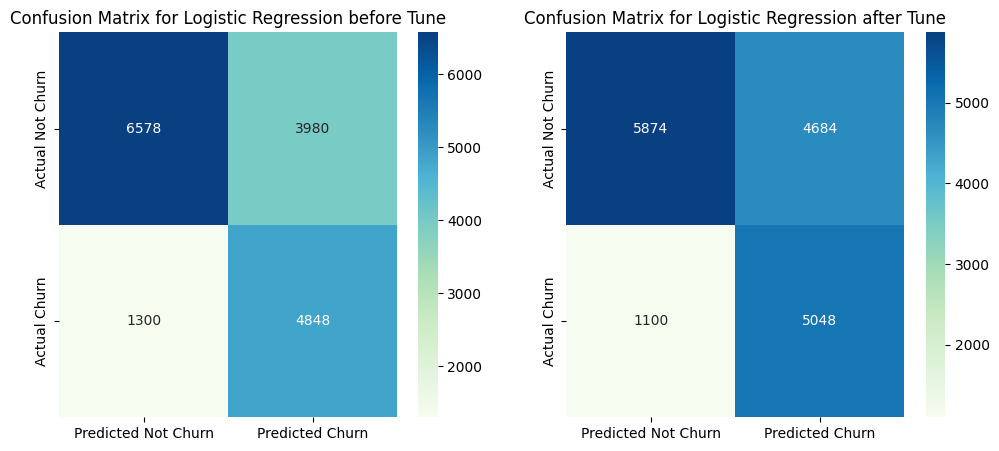

In [50]:
# Display the confusion matrix for Logistic Regression after tuning
conf_tuned_logreg = confusion_matrix(y2_test, y_pred_logreg_pamTuning)

# Define the models and confusion matrices
logreg_models = [('Logistic Regression', models[0]), ('Logistic Regression', logreg_pamTuning)]
logreg_conf_matrices = [conf_matrix[2], conf_tuned_logreg]

# Display the confusion matrices for Logistic Regression before and after tuning
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  
for i, (name, _) in enumerate(logreg_models):
    sns.heatmap(logreg_conf_matrices[i], annot=True, fmt='d', cmap='GnBu',
                xticklabels=['Predicted Not Churn', 'Predicted Churn'],
                yticklabels=['Actual Not Churn', 'Actual Churn'], ax=axes[i])
    axes[i].set_title(f'Confusion Matrix for {name}' + (' before Tune' if i < len(logreg_models) - 1 else ' after Tune'))


>Perbandingan matriks konfusi sebelum dan sesudah penyetelan hyperparameter dengan metode resampling RUS (Random Under Sampling) melalui GridSearchCV menunjukkan peningkatan dalam nilai recall model Regresi Logistik

Interpretasi:
1. Nilai recall merepresentasikan kemampuan model untuk mengidentifikasikan customer yang akan melakukan churn (pembatalan pesanan). Pada model Logistic Regression sebelum ditunning, terdapat **4848 True Positives** dan **1300 False Negatives**. Hal ini menghasilkan nilai **recall** sekitar **78.85%**, dihitung sebagai 1300 / (1300 + 4848).
1. Pada model setelah tuning (sebelah kanan), dapat terlihat peningkatan **True Positives** menjadi **5048** dan penurunan **False Negatives** menjadi **1100**. Nilai recall **82.1%** didapat dari 5048 / (1100 + 5048), yang menunjukkan peningkatan pada kemampuan model untuk mengidentifikasi dengan benar tamu yang berisiko melakukan pembatalan

Hasil ini menunjukkan peningkatan sensitivitas model pasca-penyesuaian terhadap prediksi churn, yang merupakan aspek penting bagi bisnis yang berfokus pada mempertahankan tamu agar tidak membatalkan pesanannya. Dengan meningkatkan recall, model ini memastikan lebih sedikit kasus churn yang luput dari perhatian, sehingga memungkinkan dilakukannya intervensi retensi pelanggan yang lebih tepat sasaran dan efektif. Oleh karena itu, fokus pada nilai recall setelah penyetelan hyperparameter menunjukkan keselarasan model dengan strategi retensi pelanggan yang proaktif.

In [51]:
df_metrics_tuning

,Recall,Accuracy,Precision,F1
Logistic Regression After Parameter Tuning,82.108003,65.377709,51.870119,63.576826
Logistic Regression before Parameter Tuning,78.854912,68.394589,54.916176,64.743590


**Penjelasan Matrix**
**Recall**

Dalam kasus ini, false negative berarti pelanggan yang diprediksi tidak churn, namun aktualnya churn. Itu berarti, nilai recall merepresentasikan jumlah pelanggan yang tepat diklasifikasikan churn. 

Nilai recall 82.1% berarti bahwa dari total pelanggan yang aslinya churn (6148 orang), 82.1%-nya berhasil diprediksi dengan benar (5048 orang)

Recall cocok digunakan jika cost untuk False Negative dinilai tinggi. Jika kita menggunakan metric recall, itu berarti kita berusaha untuk meminimalkan jumlah false negative yang dihasilkan oleh model, seperti dalam kasus ini kita berhasil minimalkan menjadi 1100 orang. 

**Precision**

Mengurangi False Positive berarti (kita prediksi akan dibatalkan, aktualnya tidak) memerlukan investasi besar dalam sumber daya atau layanan tambahan untuk menangani reservasi yang tidak benar-benar dibatalkan, dan dampaknya pada keuntungan hotel relatif rendah. Kita prediksikan churn (False Positive) sebanyak 4684 orang. Kita menyadari bahwa ada trade off antara precision dan recall.

Nilai precision 51.87% artinya, dari total pelanggan yang diklasifikasikan churn (9732 orang), hanya 51.87%-nya yang berhasil terprediksi dengan benar (5048 orang).

**Accuracy**

Nilai accuracy 65.37% artinya, dari keseluruhan pelanggan yang dites (16706 orang), 65.37%-nya berhasil berhasil diprediksi dengan benar (10908 orang)

In [52]:
df_enc3['is_canceled'].value_counts()

is_canceled
0    52787
1    30740
Name: count, dtype: int64

In [53]:
print(classification_report(y2_test, y_pred_logreg_pamTuning))

              precision    recall  f1-score   support

           0       0.84      0.56      0.67     10558
           1       0.52      0.82      0.64      6148

    accuracy                           0.65     16706
   macro avg       0.68      0.69      0.65     16706
weighted avg       0.72      0.65      0.66     16706



##### *`COST ESTIMATION`*

Model kita dapat mengurangi 65% customer yang akan mengcancel bookingnya untuk tidak kita layani dengan maksimal, dan model kita dapat mendapatkan 82% customer yang akan mengcancel dari seluruh customer yang akan mengcancel. (berdasarkan recallnya)

Model kita ini memiliki ketepatan prediksi customer yang akan mengcancel sebesar 52% (precisionnya), setiap kali model memprediksi bahwa seorang customer akan membatalkan, probabilitas keakuratannya mencapai sekitar 52%. Maka masih akan ada customer yang sebenarnya tidak akan mengcancel tetapi diprediksi sebagai customer yang mengcancel sekitar 35% dari keseluruhan customer yang tidak akan mengcancel.

Bila seandainya biaya untuk menyiapkan 1 kamar hotel adalah 50$ dan ada 2016 customer yang ingin membooking (1537 tidak cancel dan 479 lainnya akan cancel) maka perhitungannya kurang lebih akan menjadi seperti ini:

Tanpa Model (semua customer kita layani) :
- Total Biaya => 83527 x 50 USD = 4,176,350 USD
- Total customer tidak cancel yang dilayani => 83527 orang (karena semua kita layani)
- Total customer cancel yang tetap dilayani => 30740 orang (karena semua kita layani)
- Biaya yang terbuang => 30740 x 50 USD = 1,537,000 USD (karena 100 orang mengcancel dan menjadi sia-sia)
- Jumlah penghematan => 0 USD (belum terdeteksi dini)

> Dengan Model Logistic Regression (hanya customer yang diprediksi oleh model tidak cancel yang akan dilayani) :
> - Total Biaya => (10558 x 50 USD) + (6148 x 50 USD) = 835,300 USD
> - Total customer cancel yang dilayani => 1,100 orang (FN)
> - Total customer tidak cancel yang tidak dilayani => 4,684 orang (FP)
> - Biaya yang terbuang => 1100 x 50 USD = 55,000 USD (berdasarkan jumlah FN)
> - Jumlah penghematan/pencegahan kerugian => 5048 x 50 USD = 252400 USD (TP)


Berdasarkan contoh perhitungan diatas, terlihat bahwa menggunakan model kita, maka hotel tersebut akan menghemat biaya yang cukup besar dengan mengorbankan beberapa customer yang aktualnya tidak akan mengcancel.

### *FINAL MODEL - LOGISTIC REGRESSION AS INTERPRETABLE ML*

> Model terbaik untuk interpretable Machine Learning yang akan kita pakai adalah Logistic Regression yang telah dituning.

**Regresi Logistik**, adalah model statistik yang memanfaatkan fungsi logistik untuk memodelkan variabel dependen biner berdasarkan pada satu atau lebih variabel independen. Outputnya adalah probabilitas bahwa titik input tertentu termasuk dalam kelas tertentu, yang diubah menjadi hasil biner melalui ambang batas (misalnya, jika probabilitas output lebih besar dari 0,5, klasifikasikan sebagai kelas 1, jika tidak, kelas 0)

In [54]:
model_final = gridsearch_logreg
model_final.fit(X3_train_val, y3_train_val)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('resampling',
                                        RandomUnderSampler(random_state=10)),
                                       ('model',
                                        LogisticRegression(random_state=10))]),
             n_jobs=-1,
             param_grid={'model__C': [1e-05, 0.0001, 0.001, 0.01, 0.1],
                         'model__max_iter': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                             100],
                         'model__penalty': ['l1', 'l2', 'elastic-net', None],
                         'model__solver': ['lbfgs', 'newton-cg', 'saga',
                                           'liblinear', 'newton-cholesky']},
             scoring='recall')

In [55]:
y_pred_noScal = model_final.predict(X3_test)
recall_score(y3_test, y_pred_noScal) 

0.8210800260247235

Nilai recall dengan atau tanpa metode scaling menghasilkan nilai yang serupa, artinya tidak ada pengaruh scaling data numerik pada performa model Logistic Regression yang dibuat. 
Oleh karena itu metode scaling tidak kita terapkan pada model logistic regression akhir kita karena dapat mempersulit untuk menginterpretasikan hasil yang diperoleh.

##### *`FEATURE IMPORTANCES`*

Mari sekarang kita lihat fitur/kolom apa saja yang paling penting untuk model Decision Tree kita

In [56]:
list_name = X3_train_val.columns
list_name

Index(['previous_cancellations', 'booking_changes', 'days_in_waiting_list',
       'total_of_special_requests', 'market_segment_Groups',
       'market_segment_Offline TA/TO', 'market_segment_Online TA',
       'customer_type_Transient-Party', 'customer_type_Contract',
       'reserved_room_type_A', 'reserved_room_type_D',
       'required_car_parking_spaces_1', 'required_car_parking_spaces_2',
       'required_car_parking_spaces_3'],
      dtype='object')

In [57]:
gridsearch_logreg.best_estimator_

Pipeline(steps=[('resampling', RandomUnderSampler(random_state=10)),
                ('model',
                 LogisticRegression(C=0.01, max_iter=3, penalty='l1',
                                    random_state=10, solver='liblinear'))])

In [58]:
# menyimpan algoritma model Logistic Regression terbaik sebagai best logreg
resample = RandomUnderSampler(sampling_strategy='majority', random_state=10)
best_logreg = Pipeline([
    ('resample', resample),
    ('algo', LogisticRegression(C=0.01, max_iter=3, penalty='l1', random_state=10, solver='liblinear'))
])

best_logreg.fit(X3_train_val, y3_train_val)
y_pred_best_logreg = best_logreg.predict(X3_test)
recall_score(y3_test, y_pred_best_logreg) 

0.8210800260247235

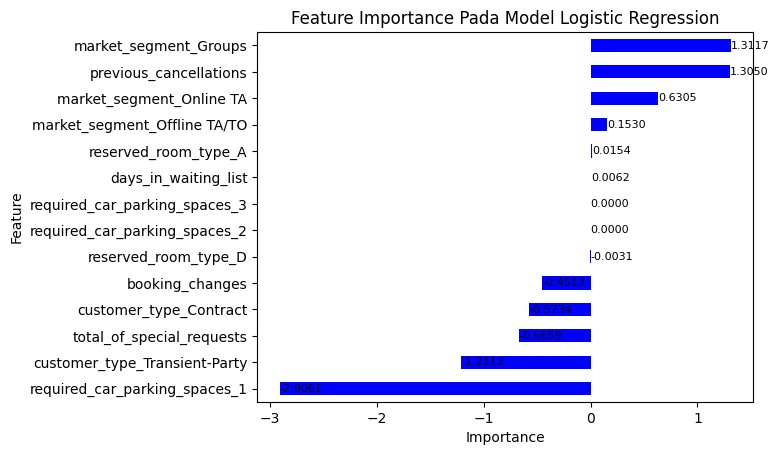

In [59]:
# Assuming best_ada['algo'] is my trained Ada Boosting model
feature_importance = best_logreg.named_steps['algo'].coef_[0]

# List of feature names
feature_names = X3_train_val.columns

# Create a Pandas Series for feature importance
coef = pd.Series(feature_importance, index=feature_names).sort_values(ascending=True)

# Plot the feature importance with blue color
fig, ax = plt.subplots()
bars = coef.plot(kind='barh', title='Feature Importance Pada Model Logistic Regression', color='blue', ax=ax)
plt.xlabel('Importance')
plt.ylabel('Feature')

# Add values on top of bars
for bar in bars.patches:
    ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.4f}', 
            verticalalignment='center', color='black', fontsize=8, ha='left')

plt.show()

- Terlihat bahwa ternyata untuk model Logistic Regression kita, fitur/kolom `market_segment_Groups` adalah yang paling penting, kemudian diikuti dengan `previous_cancellations`, `market_segment_Online TA` dan `market_segment_Offline TA/TO `. Sedangkan fitur seperti `reserved_room_type_A , days_in_waiting_list, required_car_parking_spaces_2, required_car_parking_spaces_3` dan `reserved_room_type_D` dianggap tidak begitu penting.

- Sedangkan fitur `booking changes`menunjukkan bahwa semakin besar nilai fitur ini, semakin besar kontribusinya terhadap prediksi yang negatif (Tidka melakukan pembatalan)

### *`SKOR LOG-ODDS ANALYSIS`*

> Analisis ini bertujuan untuk memahami dasar untuk membuat prediksi melalui fungsi sigmoid yang biasa kita kenal dengan istilah prediksi probabilitas sebagai nilai yang dihasilkan oleh model sebelum diubah menjadi probabilitas kelas positif jika melewati threshold yang ditentukan.

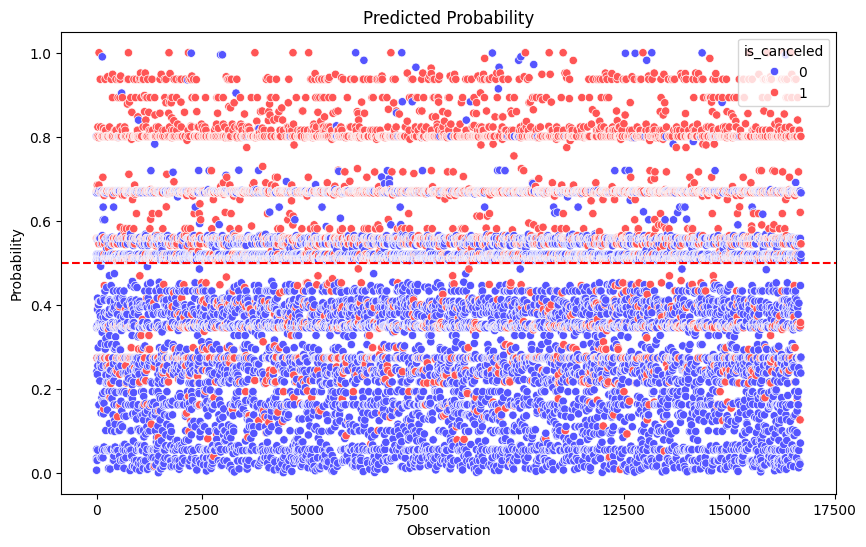

In [ ]:
# Definisi model logistic regression
logreg_tuning = LogisticRegression(C=0.01, max_iter=3, penalty='l1', solver='liblinear', random_state=10)

# Definisi resampler (RandomOverSampler sebagai contoh)
rus1 = RandomUnderSampler(sampling_strategy='majority', random_state=10)

# Menggabungkan model dan resampler dalam Pipeline
logreg_prob = Pipeline([
    ('resample', rus1),
    ('model', logreg_tuning)
])

# Fitting Pipeline pada data training dan validasi
logreg_prob.fit(X3_train_val, y3_train_val)

# Melakukan prediksi pada data test
y_pred_best_logreg = logreg_prob.predict(X3_test)

# Menampilkan scatter plot predicted probability dengan Seaborn dan hue
plt.figure(figsize=(10, 6))
sns.scatterplot(x=range(len(y_pred_best_logreg)), y=logreg_prob.predict_proba(X3_test)[:, 1], hue=y3_test, palette='seismic')
plt.axhline(y=0.5, color='r', linestyle='--')
plt.title('Predicted Probability')
plt.ylabel('Probability')
plt.xlabel('Observation')
plt.show();

In [ ]:
# Menghitung probabilitas prediksi
proba = logreg_prob.predict_proba(X3_test)[:, 1]

# Membuat DataFrame dengan kolom 'Observation', 'Probability', dan 'Actual Churn'
data_for_sorting = pd.DataFrame({
    'Observation': range(len(y_pred_best_logreg)),
    'Probability': proba,
    'Actual Churn': y3_test,
    'Index': range(len(y_pred_best_logreg))  # Menambahkan kolom Index
})

# Menyortir DataFrame berdasarkan kolom 'Probability' yang berada di rentang 0.45 hingga 0.55
data_sorted_around_05 = data_for_sorting[(data_for_sorting['Probability'] >= 0.475) & (data_for_sorting['Probability'] <= 0.525)]
data_sorted_around_05 = data_sorted_around_05.sort_values(by='Probability')

# Menampilkan DataFrame hasil sorting
data_sorted_around_05.shape[0]/data_for_sorting.shape[0]*100

19.932958218604092

In [ ]:
# Menghitung data yang salah prediksi di daerah dengan nilai prediksi probabilitas di antara 0.475 sampai 0.525
misclassified_data = data_sorted_around_05[data_sorted_around_05['Actual Churn'] != y_pred_best_logreg[data_sorted_around_05['Index']]]

# Menampilkan jumlah data yang salah prediksi
jumlah_misclassified_data = misclassified_data.shape[0]
persentase_misclassified = jumlah_misclassified_data / data_for_sorting.shape[0]*100 # 14.132% salah prediksi di daerah nilai prediksi probabilitas-nya 0.475-0.525

# Menghitung data yang salah prediksi secara keseluruhan
misclassified_data_all = data_for_sorting[data_for_sorting['Actual Churn'] != y_pred_best_logreg[data_for_sorting['Index']]]

# Menampilkan jumlah data yang salah prediksi secara keseluruhan
jumlah_misclassified_data_all = misclassified_data_all.shape[0]
persentase_misclassified_all = jumlah_misclassified_data_all / data_for_sorting.shape[0] * 100 # 34.622% data dari total yang salah prediksi

perc_data_confuse = persentase_misclassified / persentase_misclassified_all *100
perc_data_confuse


40.8195020746888

Terdapat 40.819% dari total data salah prediksi terkumpul pada data dengan nilai prediksi probabilitasnya 0.475-0.525 yang berarti machine learning model logistic regression yang menjadi model terbaik pada kasus ini masih bingung untuk memprediksi data-data ini dikarenakan belum menemukan fitur penentunya.

In [ ]:
# Memilih secara acak 1% data yang memiliki nilai probabilitas di sekitar 0.5
data_selected = data_sorted_around_05.sample(frac=0.01, random_state=10)
data_selected.head(3)

,Observation,Probability,Actual Churn,Index
68680,14345,0.520062,1,14345
39399,2968,0.506603,1,2968
69848,2094,0.511226,0,2094


Pada model machine learning Logistic Regression ini, nilai probabilitas yang mendekati 0.5 (antara 0.475 hingga 0.525) sebesar 20% dapat diartikan sebagai ketidakpastian model terhadap klasifikasa. Ketika nilai probabilitas mendekati 0.5, model mengindikasikan bahwa prediksinya tidak sangat yakin dan terdapat tingkat ketidakpastian yang signifikan.

> Secara lebih spesifik, jika nilai probabilitas prediksi sekitar 0.5, ini berarti model memiliki kesulitan untuk memutuskan kelas mana yang paling cocok untuk pengamatan tersebut. Model belum memiliki cukup informasi atau fitur yang jelas untuk membuat keputusan yang lebih tegas.

Pembahasan mendetail tentang bagaimana model memutuskan prediksinya dapat dijabarkan melalui explanable machine learning adaboost

In [ ]:
# Create a dataframe for all of the benchmarking output
df_test = pd.DataFrame(X3_test)
df_test['Churn Act'] = y3_test   # Actual Churn
df_test['Churn Prediction'] = y_pred_best_logreg    # Predicted Churn
df_test['Probability'] = logreg_prob.predict_proba(X3_test)[:,1]   # Predicted Probability
df_test['Probability Cluster'] = pd.cut(df_test['Probability'], bins=[0, 0.25, 0.5, 0.75, 1], labels=['Low', 'Medium-Low', 'Medium-High','High'])

cluster_analysis_updated = df_test.groupby('Probability Cluster').agg({
    'Probability': 'mean',
    'Churn Act': lambda x: x.mode().iloc[0] if not x.mode().empty else None,
    'Churn Prediction': lambda x: x.mode().iloc[0] if not x.mode().empty else None,
    'previous_cancellations': 'mean',
    'booking_changes': 'mean',
    'days_in_waiting_list': 'mean',
    'total_of_special_requests': 'mean',
    'market_segment_Groups': lambda x: x.mode().iloc[0] if not x.mode().empty else None,
    'market_segment_Offline TA/TO': lambda x: x.mode().iloc[0] if not x.mode().empty else None,
    'market_segment_Online TA': lambda x: x.mode().iloc[0] if not x.mode().empty else None
}).rename(columns={'previous_cancellations':'Cancellation frequency', 'booking_changes':'Changement frequency',
                   'days_in_waiting_list':'Waiting Days', 'total_of_special_requests':'Special Requests'}).reset_index()

cluster_analysis_updated

,Probability Cluster,Probability,Churn Act,Churn Prediction,Cancellation frequency,Changement frequency,Waiting Days,Special Requests,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA
0,Low,0.128213,0,0,0.006050,0.612773,0.385546,1.174118,0,0,0
1,Medium-Low,0.349103,0,0,0.004501,0.398100,1.562891,0.902476,0,0,0
2,Medium-High,0.572455,0,1,0.018760,0.029072,2.415207,0.306498,0,0,1
3,High,0.834222,1,1,0.664290,0.007724,5.925134,0.029115,1,0,0


> Terdapat perbedaan mayoritas churn dan not-churn terhadap nilai probabilitas prediksi pada cluster Medium-High. Kita dapat menganalisanya lebih lanjut menggunakan explanable machine learning AdaBoost (Adaptive Boosting) untuk mengetahui mengapa dan bagaimana Machine Learning memberikan label churn dan not-churn berdasarkan fitur-fitur yang ada.

In [ ]:
X3_test.columns

Index(['previous_cancellations', 'booking_changes', 'days_in_waiting_list',
       'total_of_special_requests', 'market_segment_Groups',
       'market_segment_Offline TA/TO', 'market_segment_Online TA',
       'customer_type_Transient-Party', 'customer_type_Contract',
       'reserved_room_type_A', 'reserved_room_type_D',
       'required_car_parking_spaces_1', 'required_car_parking_spaces_2',
       'required_car_parking_spaces_3'],
      dtype='object')

Tidak ada perbedaan rata-rata maupun median pada fitur Cancellation frequency dan Changement frequency pada setiap cluster

> Menggunakan model Logistic Regression untuk analisis Shap dan Lime sebenarnya bisa menjadi pilihan yang baik tergantung pada konteks dan kompleksitas data. Namun, beberapa kekurangan yang mungkin dimiliki oleh pendekatan ini termasuk:

1. Kemampuan Representasi yang Terbatas: Model Logistic Regression memiliki kemampuan representasi yang terbatas dibandingkan dengan model yang lebih kompleks seperti Adaboost. Ini berarti model tersebut mungkin tidak mampu menangkap hubungan yang lebih kompleks di antara variabel-variabel dalam data.

1. Keterbatasan Ekspresivitas Model: Logistic Regression memiliki batasan dalam menangani non-linearitas dan interaksi kompleks antara fitur-fitur. Jika data memiliki pola yang rumit, Logistic Regression mungkin tidak dapat menangkapnya dengan baik.

1. Kurangnya Ketahanan terhadap Outlier: Logistic Regression dapat rentan terhadap pengaruh outlier, sedangkan model ensemble seperti Adaboost mungkin lebih tahan terhadap gangguan ekstrem.

### *FINAL MODEL - ADABOOSTING AS EXPLAINABLE ML*

Model terbaik untuk Explainable Machine Learning yang dipilih yaitu model Adaboosting yang telah dituning.

Adaboosting (Adaptive Boosting) adalah algoritma ensemble learning yang menggunakan pendekatan Gradient Boosting. Dalam Adaboost, sejumlah kecil model prediktif yang lemah (weak learners), seperti Decision Stumps (decision tree yang hanya memiliki satu level atau satu keputusan), digunakan secara berurutan. Setiap model prediktif diberi bobot berdasarkan kinerjanya pada data pelatihan.

Proses pelatihan Adaboost dimulai dengan memberikan bobot yang sama untuk setiap sampel dalam data pelatihan. Setelah model pertama dipelajari, bobot diperbarui untuk memberikan penekanan lebih pada sampel yang salah diprediksi oleh model sebelumnya.

Selanjutnya, model berikutnya difokuskan pada sampel yang memiliki bobot yang lebih tinggi, dengan tujuan untuk memperbaiki prediksi yang salah sebelumnya. Proses ini berlanjut untuk sejumlah iterasi (jumlah model prediktif yang ditentukan sebelumnya) atau hingga mencapai tingkat akurasi yang diinginkan sehingga menciptakan kombinasi model yang lebih akurat secara keseluruhan.

> Adaboosting dapat dianggap sebagai algoritma yang adaptif karena kemampuannya mengatasi kesulitan dalam data pelatihan dan secara adaptif meningkatkan bobot sampel yang sulit diakurasi. Algoritma ini digunakan untuk tugas klasifikasi dan regresi di mana peningkatan akurasi secara bertahap diinginkan.

### `max_depth`

Pemilihan matrix accuracy bukan menjadi matrix utama, namun bertujuan untuk melihat seberapa baik model dapat memprediksi dengan baik dalam penentuan parameter terbaik untuk mendapatkan performa maksimal

In [ ]:
max_depth = range(3, 51, 2)
testing_adaAcc = []
training_adaAcc = []
score0 = 0
best_maxDepth = 0  # Inisialisasi variabel best_maxDepth

for i in max_depth:
    tree = DecisionTreeClassifier(
        max_depth=i,
        random_state=10)
    tree.fit(X3_train_val, y3_train_val)

    y_predict_train = tree.predict(X3_train_val)
    training_adaAcc.append(accuracy_score(y3_train_val, y_predict_train))

    y_predict_test = tree.predict(X3_test)
    recall_test = accuracy_score(y3_test, y_predict_test)
    testing_adaAcc.append(recall_test)

    if score0 < recall_test:
        best_maxDepth = i
        score0 = recall_test

print('best maximum depth:', best_maxDepth)
print(f'Accuracy score: {round(score0 * 100, 2)}%')

best maximum depth: 15
Accuracy score: 77.4%


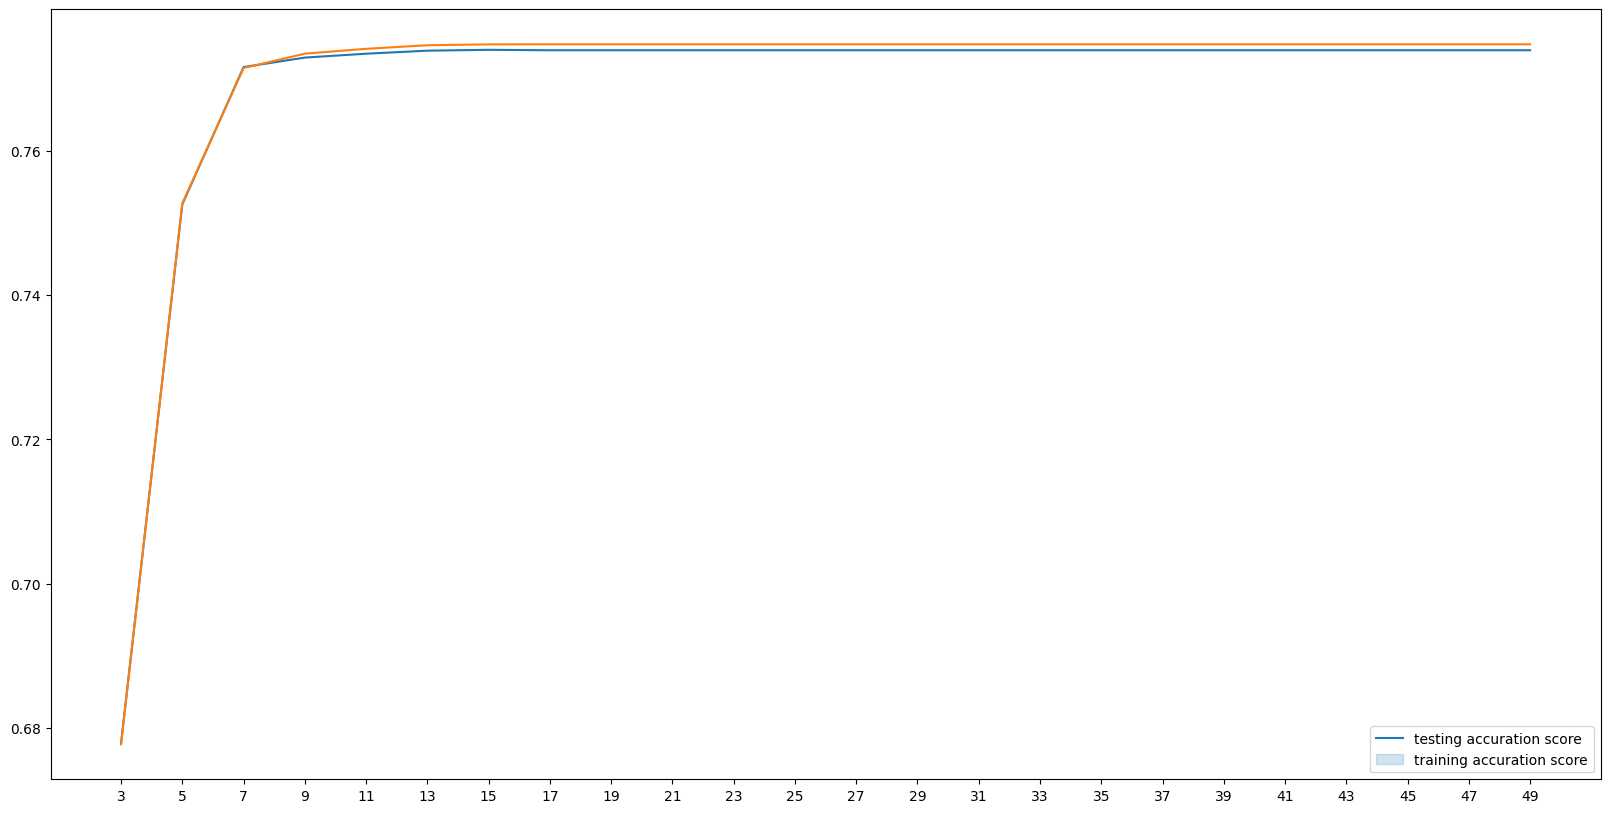

In [ ]:
length = range(len(max_depth))

plt.figure(figsize = (20,10))
sns.lineplot(x=length,y=testing_adaAcc)
sns.lineplot(x=length,y=training_adaAcc)
plt.legend(['testing accuration score','training accuration score'])
plt.xticks(length,max_depth)
plt.show()

Parameter max_depth = 15 lah yang berpeluang memberikan performa maksimal

### `min_samples_split`

In [ ]:
samples_split = range(2, 61, 2)
testing_adaAcc = []
training_adaAcc = []
score0 = 0
best_maxSplit = 0  # Inisialisasi variabel best_maxDepth

for i in samples_split:
    tree = DecisionTreeClassifier(
        max_depth=15,
        min_samples_split=i,
        random_state=10)
    tree.fit(X3_train_val, y3_train_val)

    y_predict_train = tree.predict(X3_train_val)
    training_adaAcc.append(accuracy_score(y3_train_val, y_predict_train))

    y_predict_test = tree.predict(X3_test)
    recall_test = accuracy_score(y3_test, y_predict_test)
    testing_adaAcc.append(recall_test)

    if score0 < recall_test:
        best_maxSplit = i
        score0 = recall_test

print('best maximum depth:', best_maxSplit)
print(f'Accuracy score: {round(score0 * 100, 2)}%')

best maximum depth: 36
Accuracy score: 77.41%


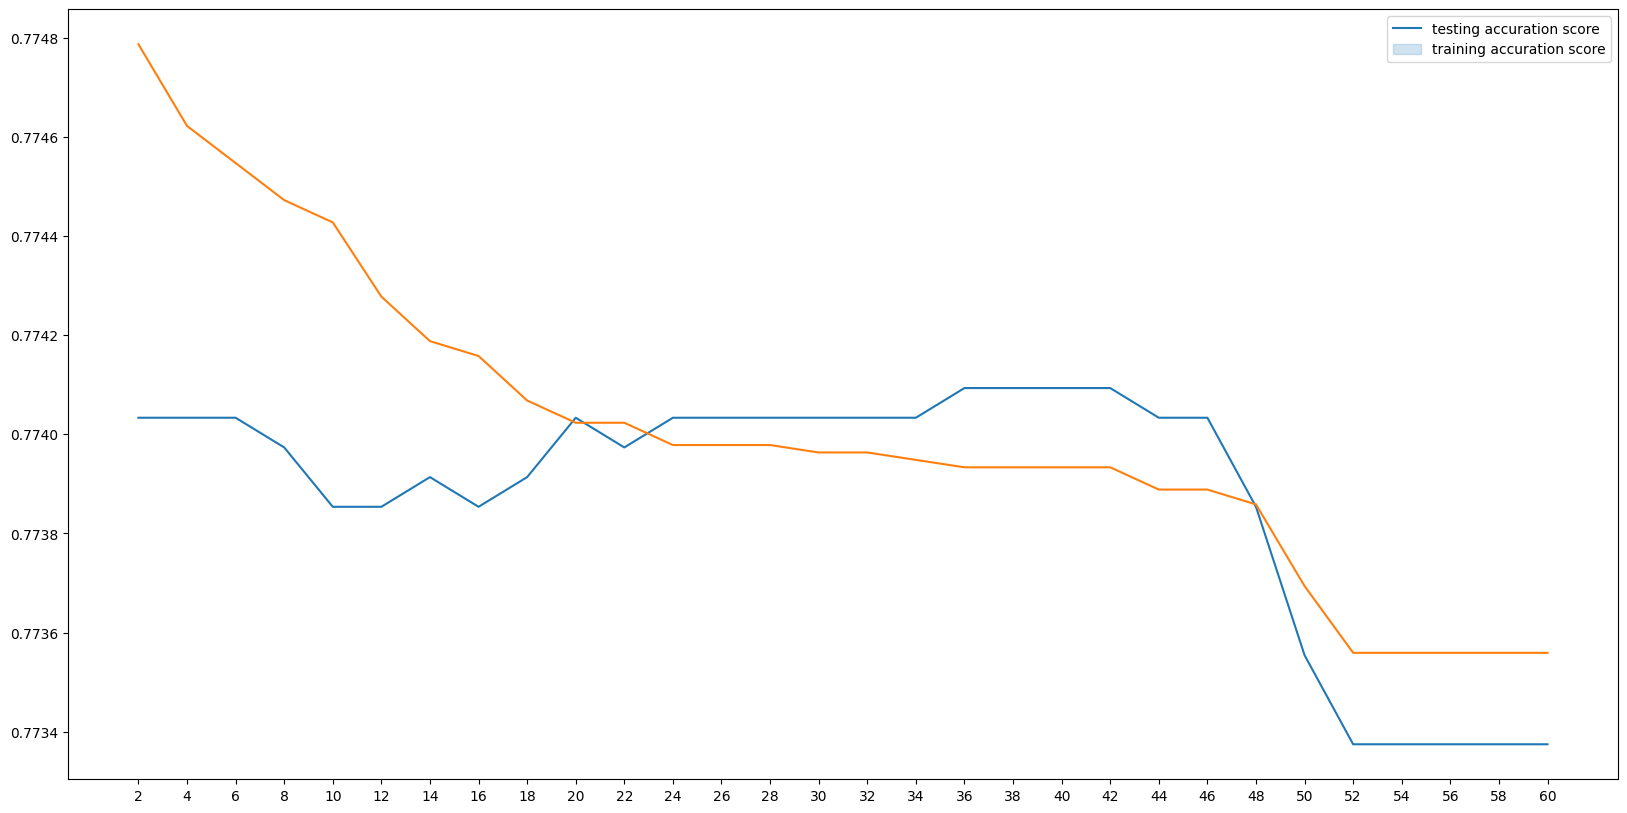

In [ ]:
length = range(len(samples_split))

plt.figure(figsize = (20,10))
sns.lineplot(x=length,y=testing_adaAcc)
sns.lineplot(x=length,y=training_adaAcc)
plt.legend(['testing accuration score','training accuration score'])
plt.xticks(length,samples_split)
plt.show()

Parameter max_depth = 15 dan min_samples_split = 36 lah yang berpeluang memberikan performa maksimal

### `min_samples_leaf`

In [ ]:
samples_leaf = range(4, 61, 2)
testing_adaAcc = []
training_adaAcc = []
score0 = 0
best_maxLeaf = 0  # Inisialisasi variabel best_maxDepth

for i in samples_leaf:
    tree = DecisionTreeClassifier(
        max_depth=15,
        min_samples_split=36,
        min_samples_leaf=i,
        random_state=10)
    tree.fit(X3_train_val, y3_train_val)

    y_predict_train = tree.predict(X3_train_val)
    training_adaAcc.append(accuracy_score(y3_train_val, y_predict_train))

    y_predict_test = tree.predict(X3_test)
    recall_test = accuracy_score(y3_test, y_predict_test)
    testing_adaAcc.append(recall_test)

    if score0 < recall_test:
        best_maxLeaf = i
        score0 = recall_test

print('best maximum depth:', best_maxLeaf)
print(f'Accuracy score: {round(score0 * 100, 2)}%')

best maximum depth: 12
Accuracy score: 77.39%


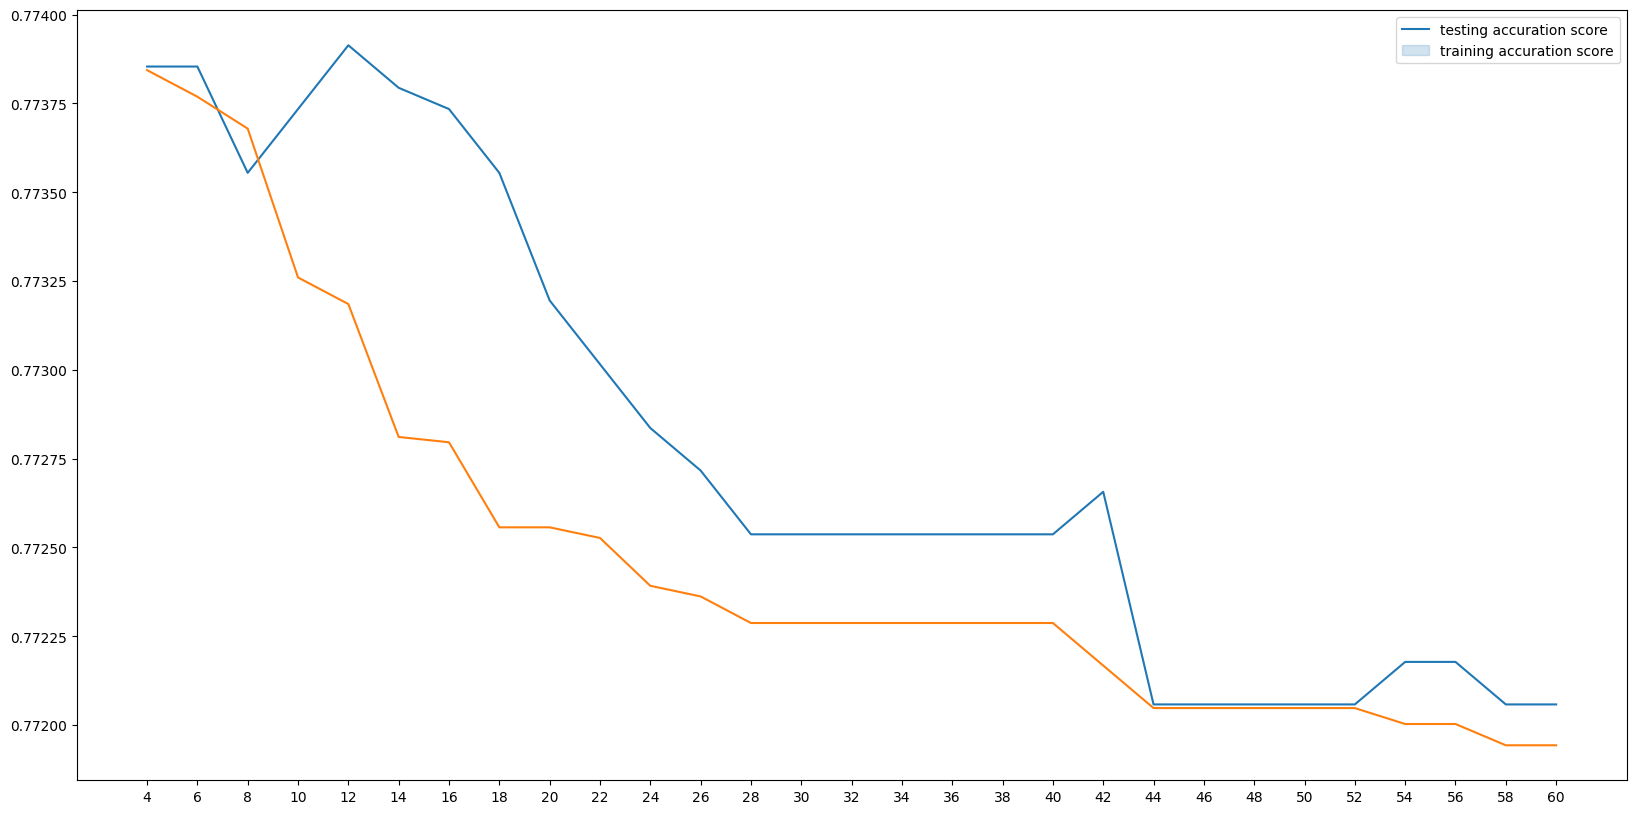

In [ ]:
length = range(len(samples_leaf))

plt.figure(figsize = (20,10))
sns.lineplot(x=length,y=testing_adaAcc)
sns.lineplot(x=length,y=training_adaAcc)
plt.legend(['testing accuration score','training accuration score'])
plt.xticks(length,samples_leaf)
plt.show()

Parameter max_depth = 15, min_samples_split = 36, dan min_samples_leaf = 12 lah yang berpeluang memberikan performa maksimal

#### Parameter n_estimators : Ada Boosting

In [ ]:
# Define Hyperparameter space 

hyperparam_space = {
    'model__learning_rate': [0.00001, 0.0001, 0.001, 0.01, 0.1],
    'model__algorithm': ['SAMME','SAMME.R'],
}

# Membuat objek DecisionTreeClassifier dengan parameter yang diinginkan
base_estimator = DecisionTreeClassifier(max_depth=15, min_samples_split=36, min_samples_leaf=12, random_state=10)

ada_tune = AdaBoostClassifier(estimator = base_estimator, random_state=10) # Menghasilkan penurunan performa
ada = AdaBoostClassifier(random_state=10)
rus = RandomUnderSampler(random_state=10)

pipe_model = Pipeline([
    ('resampling', rus),
    ('model', ada)
])

# Define the grid search
gridsearch_ada = GridSearchCV(
    estimator=pipe_model,
    param_grid=hyperparam_space,  # hyperparameter space
    cv=StratifiedKFold(n_splits=5),  # cross-validation scheme 
    scoring = 'recall',   # evaluation metrics
    n_jobs = -1   # To speed up the process by utilizing multiple cores of the machine
)

gridsearch_ada.fit(X3_train_val, y3_train_val)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('resampling',
                                        RandomUnderSampler(random_state=10)),
                                       ('model',
                                        AdaBoostClassifier(random_state=10))]),
             n_jobs=-1,
             param_grid={'model__algorithm': ['SAMME', 'SAMME.R'],
                         'model__learning_rate': [1e-05, 0.0001, 0.001, 0.01,
                                                  0.1]},
             scoring='recall')

In [ ]:
# Showing the chosen parameters details by the Grid Search based on Train dataset
print('Best Hyperparameters: ', gridsearch_ada.best_params_)
print('Best Score: ', gridsearch_ada.best_score_)

Best Hyperparameters:  {'model__algorithm': 'SAMME', 'model__learning_rate': 0.1}
Best Score:  0.7715922052748632


In [ ]:
pd.DataFrame(gridsearch_ada.cv_results_).sort_values('rank_test_score').head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__algorithm,param_model__learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,4.302923,0.635063,0.355366,0.051655,SAMME,0.1,"{'model__algorithm': 'SAMME', 'model__learning_rate': 0.1}",0.772515,0.775158,0.764742,0.774705,0.770842,0.771592,0.003762,1
8,4.847732,0.318122,0.379041,0.096087,SAMME.R,0.01,"{'model__algorithm': 'SAMME.R', 'model__learning_rate': 0.01}",0.772515,0.775158,0.764742,0.774705,0.770842,0.771592,0.003762,1
0,4.395528,0.781060,0.345743,0.070829,SAMME,0.00001,"{'model__algorithm': 'SAMME', 'model__learning_rate': 1e-05}",0.759504,0.762960,0.750712,0.764335,0.756608,0.758824,0.004872,3
1,4.205859,0.669654,0.366304,0.071830,SAMME,0.0001,"{'model__algorithm': 'SAMME', 'model__learning_rate': 0.0001}",0.759504,0.762960,0.750712,0.764335,0.756608,0.758824,0.004872,3
2,4.175018,0.525838,0.360655,0.056666,SAMME,0.001,"{'model__algorithm': 'SAMME', 'model__learning_rate': 0.001}",0.759504,0.762960,0.750712,0.764335,0.756608,0.758824,0.004872,3


Dari tabel di atas, kita dapat melihat bahwa 5 rata-rata skor recall tertinggi didominasi oleh hyperparameter `algorithm` SAMME. Sedangkan `learning_rate` masih cukup bervariasi antara 0.00001, 0.0001, 0.01 dan 0.1. Hal tersebut menunjukkan bahwa skor recall yang tinggi lebih dipengaruhi oleh `learning_rate` pada model Ada Boosting.

Selanjutnya mari kita coba predict ke test set.

In [ ]:
# Assigning the best model GridSearchCV
ada_pamTuning = gridsearch_ada.best_estimator_
ada_pamTuning.fit(X3_train_val, y3_train_val)

Pipeline(steps=[('resampling', RandomUnderSampler(random_state=10)),
                ('model',
                 AdaBoostClassifier(algorithm='SAMME', learning_rate=0.1,
                                    random_state=10))])

In [ ]:
df_metrics = pd.DataFrame(metrics, columns=['Recall','Accuracy', 'Precision', 'F1'], index=index_names)

In [ ]:
from sklearn.metrics import recall_score

# Predict the test dataset using the best model from grid search process
y_pred_ada_pamTuning = ada_pamTuning.predict(X3_test)

accuracy_ada_pamTuning = accuracy_score(y3_test, y_pred_ada_pamTuning) * 100
precision_ada_pamTuning = precision_score(y3_test, y_pred_ada_pamTuning) * 100
recall_ada_pamTuning = recall_score(y3_test, y_pred_ada_pamTuning) * 100
f1_ada_pamTuning = f1_score(y3_test, y_pred_ada_pamTuning) * 100


ada_after_pamTuning = pd.DataFrame({'Recall': recall_ada_pamTuning,
                                    'Accuracy': accuracy_ada_pamTuning,
                                   'Precision': precision_ada_pamTuning,
                                  'F1': f1_ada_pamTuning}, index=['AdaBoost After Parameter Tuning'])

df_metrics = pd.DataFrame(metrics, columns=['Recall','Accuracy', 'Precision', 'F1'], index=index_names)

# Display the metrics for the Grid Search
df_metrics = df_metrics.loc[['AdaBoost _RUS']]
# df_metrics
df_metrics_tuning = pd.concat([ada_after_pamTuning, df_metrics])
df_metrics_tuning

,Recall,Accuracy,Precision,F1
AdaBoost After Parameter Tuning,77.130774,63.498144,50.264999,60.865101
AdaBoost _RUS,66.525699,74.099126,64.318289,65.403374


Setelah dilakukan hyperparameter tuning, terjadi kenaikan performa model AdaBoost sebesar +10.61% terhadap matrix recall. Kenaikan tersebut diakibatkan oleh konfigurasi parameter `algorithm` = SAMME dan `learning_rate` = 0.1.

In [ ]:
ada1 = AdaBoostClassifier(algorithm = 'SAMME', learning_rate = 0.1, random_state = 10)

# menyimpan algoritma model Decision Tree terbaik sebagai best tree
best_ada = Pipeline([
    ('resample', rus),
    ('algo', ada1)
])

best_ada.fit(X2_train_val, y2_train_val)
y_pred_best_ada = best_ada.predict(X2_train_val)
recall_score(y2_train_val, y_pred_best_ada) 

0.7715923877683799

Tidak ada perbedaan performa machine learning AdaBoost pada fitur - fitur numerik yang tidak discaling dan yang discaling.

##### *`FEATURE IMPORTANCES`*

Mari sekarang kita lihat fitur/kolom apa saja yang paling penting untuk model AdaBoosting kita

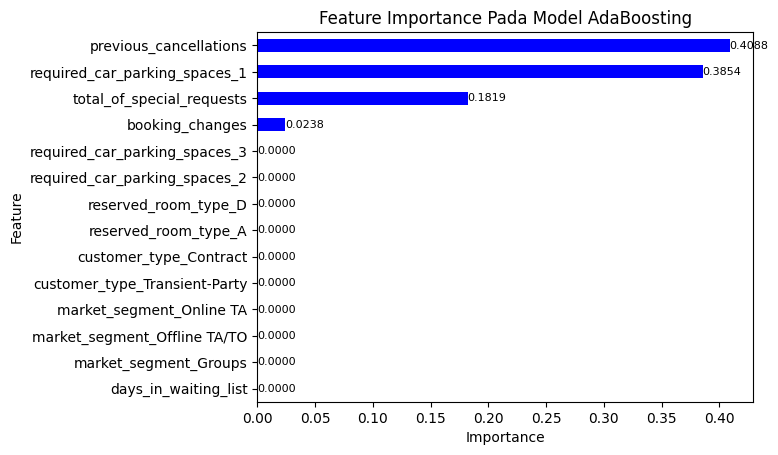

In [ ]:
# Assuming best_ada['algo'] is my trained Ada Boosting model
feature_importance = best_ada.named_steps['algo'].feature_importances_

# List of feature names
feature_names = X3_train_val.columns

# Create a Pandas Series for feature importance
coef = pd.Series(feature_importance, index=feature_names).sort_values(ascending=True)

# Plot the feature importance with blue color
fig, ax = plt.subplots()
bars = coef.plot(kind='barh', title='Feature Importance Pada Model AdaBoosting', color='blue', ax=ax)
plt.xlabel('Importance')
plt.ylabel('Feature')

# Add values on top of bars
for bar in bars.patches:
    ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.4f}', 
            verticalalignment='center', color='black', fontsize=8, ha='left')

plt.show()

In [ ]:
coef

days_in_waiting_list             0.000000
market_segment_Groups            0.000000
market_segment_Offline TA/TO     0.000000
market_segment_Online TA         0.000000
customer_type_Transient-Party    0.000000
customer_type_Contract           0.000000
reserved_room_type_A             0.000000
reserved_room_type_D             0.000000
required_car_parking_spaces_2    0.000000
required_car_parking_spaces_3    0.000000
booking_changes                  0.023797
total_of_special_requests        0.181948
required_car_parking_spaces_1    0.385408
previous_cancellations           0.408846
dtype: float64

Terlihat bahwa ternyata untuk model AdaBoosting kita, fitur/kolom `days_in_waiting_list` adalah yang paling penting, kemudian diikuti dengan `previous_cancellations`, `Omarket_segment_Groups `, `market_segment_Online TA ` dan `Pmarket_segment_Offline TA/TO`. Sedangkan fitur seperti required_car_parking_spaces_1, 2, dan 3 dianggap tidak begitu penting.

Hal ini cukup berbeda dengan model Logistic Regression kita sebelumnya, dimana fitur yang pentingnya hanya `market_segment_Groups`, `previous_cancellations`, dan `market_segment_Online TA`.

##### *`CONFUSION MATRIX`*

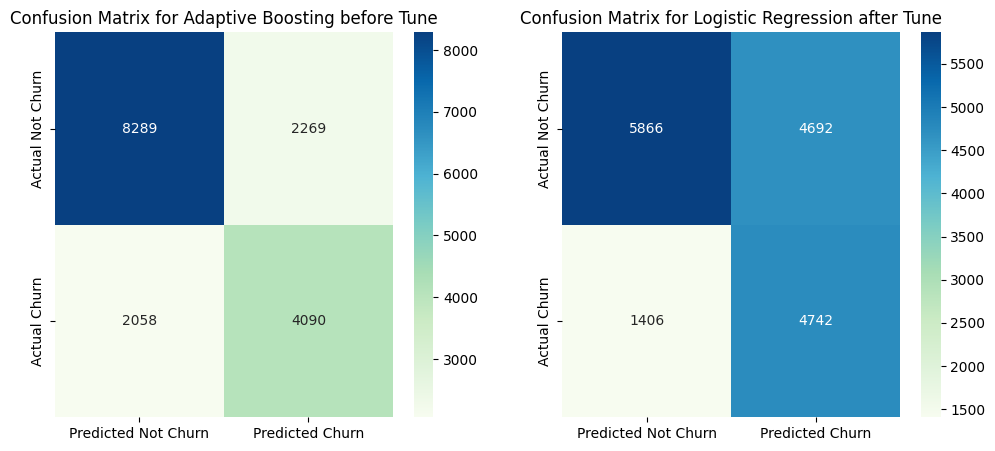

In [ ]:
best_ada = Pipeline([
    ('resample', rus),
    ('algo', ada1)
])

best_ada.fit(X3_train_val, y3_train_val)
y_pred_best_ada = best_ada.predict(X3_test)

# Assigning the best model GridSearchCV
ada_pamTuning = gridsearch_ada.best_estimator_
ada_pamTuning.fit(X3_train_val, y3_train_val)

# Display the confusion matrix for Logistic Regression after tuning
conf_tuned_ada = confusion_matrix(y3_test, y_pred_best_ada)

# Define the models and confusion matrices
ada_models = [('Adaptive Boosting', models[4]), ('Logistic Regression', ada_pamTuning)]
ada_conf_matrices = [conf_matrix[5], conf_tuned_ada]

# Display the confusion matrices for Logistic Regression before and after tuning
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  
for i, (name, _) in enumerate(ada_models):
    sns.heatmap(ada_conf_matrices[i], annot=True, fmt='d', cmap='GnBu',
                xticklabels=['Predicted Not Churn', 'Predicted Churn'],
                yticklabels=['Actual Not Churn', 'Actual Churn'], ax=axes[i])
    axes[i].set_title(f'Confusion Matrix for {name}' + (' before Tune' if i < len(logreg_models) - 1 else ' after Tune'))


>Perbandingan matriks konfusi sebelum dan sesudah penyetelan hyperparameter dengan metode resampling RUS (Random Under Sampling) melalui GridSearchCV menunjukkan peningkatan dalam nilai recall model AdaBoost

Interpretasi:
1. Nilai recall merepresentasikan kemampuan model untuk mengidentifikasikan customer yang akan melakukan churn (pembatalan pesanan). Pada model Adaptive Boosting sebelum ditunning, terdapat **4090 True Positives** dan **2058 False Negatives**.
1. Pada model setelah tuning (sebelah kanan), dapat terlihat peningkatan **True Positives** menjadi **4742** dan penurunan **False Negatives** menjadi **1406**.

Hasil ini menunjukkan peningkatan sensitivitas model pasca-penyesuaian terhadap prediksi churn, yang merupakan aspek penting bagi bisnis yang berfokus pada mempertahankan tamu agar tidak membatalkan pesanannya. Dengan meningkatkan recall, model ini memastikan lebih sedikit kasus churn yang luput dari perhatian, sehingga memungkinkan dilakukannya intervensi retensi pelanggan yang lebih tepat sasaran dan efektif. Oleh karena itu, fokus pada nilai recall setelah penyetelan hyperparameter menunjukkan keselarasan model dengan strategi retensi pelanggan yang proaktif.

##### *`COST ESTIMATION`*

> Dengan Model AdaBoost(hanya customer yang diprediksi oleh model tidak cancel yang akan dilayani) :
> - Total Biaya => (10558 x 50 USD) + (6148 x 50 USD) = 835,300 USD
> - Total customer cancel yang dilayani => 1,406 orang (FN)
> - Total customer tidak cancel yang tidak dilayani => 4,692 orang (FP)
> - Biaya yang terbuang => 4692 x 50 USD = 234,600 USD (berdasarkan jumlah FP)
> - Jumlah penghematan/pencegahan kerugian => 4742 x 50 USD = 237,100 USD (TP)

##### *`LOCAL INTERPRETABLE MODEL-AGNOSTIC EXPLANATION (LIME)`*

In [ ]:
import lime
from lime import lime_tabular

# Base Classifier
ada_lime = ada1
ada_lime.fit(X3_train_val, y3_train_val)
score = ada_lime.score(X3_test, y3_test)

In [ ]:
# Explainer based
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X3_train_val),
    feature_names=X3_train_val.columns,
    class_names=['Not Cancalled', 'Cancalled'],
    mode='classification'
)

The prediction must predict this passenger is: Churn from y_test


''

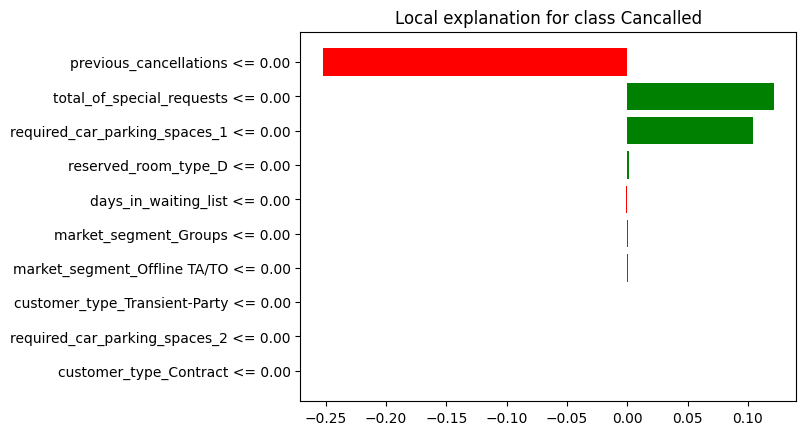

In [ ]:
# Try to the observation 6
# Lets compare with the real result
print(f"The prediction must predict this passenger is: {('Churn' if y3_test[14345] == 1 else 'Not Churn')} from y_test")

exp = explainer.explain_instance(X3_test.iloc[14345],
                                 ada_lime.predict_proba,
                                 num_features=10)
exp.as_pyplot_figure()
;

Interpretasi :
1. Pada customer dengan index 452, `previous_cancellations` <=0  yang dimiliki cenderung mendorong orang tersebut untuk Not-Churn.
1. Sedangkan `total_of_special_requests` <=0 dan `required_car_parking_spaces_1` <= 0 dapat menjadi faktor yang mendorong untuk Churn.
1. `days_in_waiting_list`akan meminimalisir kemungkinan customer ini (index 452) untuk Churn.

The prediction must predict this passenger is: Not Churn from y_test


''

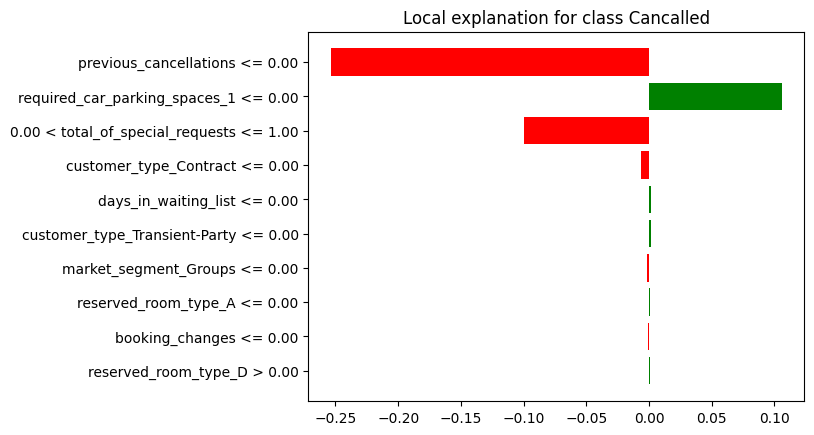

In [ ]:
# Try to the observation 6
# Lets compare with the real result
print(f"The prediction must predict this passenger is: {('Churn' if y3_test[2968] == 1 else 'Not Churn')} from y_test")

exp = explainer.explain_instance(X3_test.iloc[2968],
                                 ada_lime.predict_proba,
                                 num_features=10)
exp.as_pyplot_figure()
;

Interpretasi :
1. Pada customer dengan index 2968, `previous_cancellations` <=0 yang dimiliki cenderung mendorong orang tersebut untuk Not-Churn.
1. Sedangkan `required_car_parking_spaces_1` <=0 dapat menjadi faktor yang mendorong untuk Churn.
1. 0 < `total_of_special_requests` <= 1, `custumer_type_Transcient_Party` <= 0, `market_segment_Groups` <= 0, dan `booking_changes` <= 0 akan meminimalisir kemungkinan customer ini (index 2968) untuk Churn.

The prediction must predict this passenger is: Not Churn from y_test


''

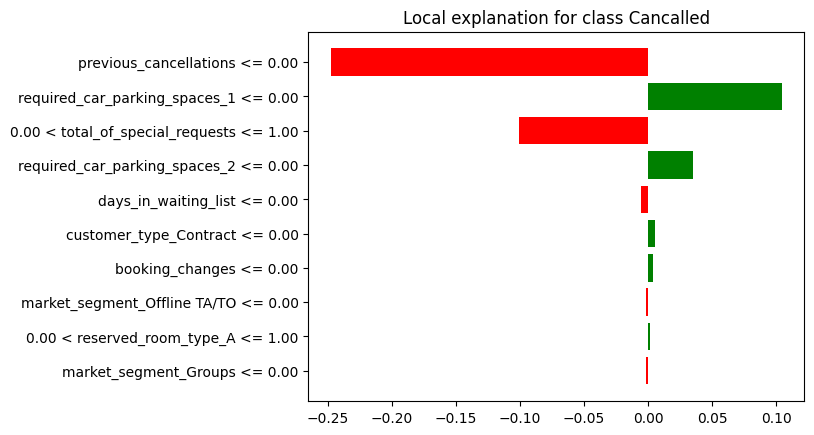

In [ ]:
# Try to the observation 6
# Lets compare with the real result
print(f"The prediction must predict this passenger is: {('Churn' if y3_test[2094] == 1 else 'Not Churn')} from y_test")

exp = explainer.explain_instance(X3_test.iloc[2094],
                                 ada_lime.predict_proba,
                                 num_features=10)
exp.as_pyplot_figure()
;

Interpretasi :
1. Pada customer dengan index 2094, `previous_cancellations` <=0 yang dimiliki cenderung mendorong orang tersebut untuk Not-Churn.
1. Sedangkan `required_car_parking_spaces_1` <=0 dapat menjadi faktor yang mendorong untuk Churn.
1. 0 < `total_of_special_requests` <= 1, `days_in_waiting_list` <= 0, `market_segment_Offline TA/TO` <= 0, dan `market_segment_Groups` <= 0 akan meminimalisir kemungkinan customer ini (index 2094) untuk Churn.

## **CONCLUSION & RECOMMENDATION**

### *CONCLUSION*

Berdasarkan hyperparameter tuning, parameter terbaik yang dapat digunakan untuk benchmark model Logistic Regression adalah :
    - algorithm = SAMME
    - learning_rate = 0.1

- Metric utama yang akan kita gunakan adalah recall, karena kita bertujuan untuk meminimalisir customer yang diprediksi tidak cancel padahal churn/cancel (FN) dengan pengaruh FP (diprediksi cancel padahal tidak) sangat kecil.
    <br>
    <br>
- Berdasarkan hyperparameter tuning, parameter terbaik yang dapat digunakan untuk benchmark model Logistic Regression adalah :
    - C = 0.01
    - max_iter = 3
    - penalty = l1
    - solver = liblinear
    <br>
    <br>
- Berdasarkan pemodelan Logistic Regression, fitur/kolom `market_segment_Groups` adalah yang paling penting dan berpengaruh terhadap target (Churn), kemudian diikuti dengan `previous_cancellations` dan `Mmarket_segment_Online TA`.
    <br>
    <br>
- Interpretasi pada scatter plot nilai probabilitas prediksi dari Model Logistic Regression adalah sebagai berikut :
    - Terdapat 40.819% dari total data salah prediksi terkumpul pada data dengan nilai prediksi probabilitasnya 0.475-0.525
    - Berarti bahwa machine learning model logistic regression yang menjadi model terbaik pada kasus ini masih bingung untuk memprediksi data-data ini.
    <br>
    <br>
- Berdasarkan hyperparameter tuning, parameter terbaik yang dapat digunakan untuk benchmark model Adaptive Boosting adalah :
    - algorithm = SAMME
    - learning_rate = 0.1
    <br>
    <br>
- Interpretasi LIME untuk model AdaBoost :
    - Customer dengan `required_car_parking_spaces_1` <=0, cenderung memiliki kemungkinan churn yang lebih tinggi.
    - Customer dengan `previous_cancellations` <=0 cenderung memiliki kemungkinan Not-Churn yang lebih tinggi.
    - Customer dengan `days_in_waiting_list` <= 0,  Transcient-Party dan Contact, semakin besar kemungkinan pelanggan untuk Churn
    - Kemudian customer `market_segment` Groups dan Offline TA/TO <= 0, `total_of_special_requests`, dan `booking_changes` <= 0 akan meminimalisir kemungkinan untuk Churn.
    <br>
    <br>
- Berdasarkan contoh perhitungan biaya :
    - Potensi kerugian yang mungkin didapat tanpa adanya penerapan machine learning diperkirakan sebesar : $ 1,537,000 untuk 30,740 kamar.
    - Potensi kerugian yang mungkin didapat dengan menerapkan Model Logistic Regression yang telah dibuat diperkirakan sebesar : $ 55,000 untuk 1,100 kamar.
    - Potensi kerugian yang mungkin didapat dengan menerapkan model AdaBoost yang telah dibuat diperkirakan sebesar : $70,300 per bulan untuk 1,406 kamar.
    <br>
    <br>
- Berdasarkan contoh hitungan tersebut, terlihat bahwa dengan menggunakan model kita, maka perusahaan dapat menghemat sebesar :
    - Dengan Model Logistic Regression : $ 252,400 (asumsi $50/kamar) karena tepat mendeteksi customer cancellation sebanyak 5048 orang.
    - Dengan Model AdaBoost : $ 237,100 (asumsi $50/kamar) karena tepat mendeteksi customer cancellation sebanyak 4742 orang.
    - Mengingat jumlah customer pada *high season* yang berpotensi mengalami kelonjakan pengunjung, tentunya potensi penghematan yang didapat bisa lebih besar lagi apabila karakteristik customer masih masuk dalam rentang data yang digunakan dalam pemodelan.

In [64]:
X3_train_val.describe()

,previous_cancellations,booking_changes,days_in_waiting_list,total_of_special_requests,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,customer_type_Transient-Party,customer_type_Contract,reserved_room_type_A,reserved_room_type_D,required_car_parking_spaces_1,required_car_parking_spaces_2,required_car_parking_spaces_3
count,66821.000000,66821.000000,66821.000000,66821.000000,66821.000000,66821.000000,66821.000000,66821.000000,66821.000000,66821.000000,66821.000000,66821.000000,66821.000000,66821.000000
mean,0.089029,0.221038,2.112330,0.572889,0.164409,0.202825,0.472591,0.209680,0.034360,0.718801,0.161177,0.062241,0.000195,0.000015
std,0.879251,0.649652,15.316484,0.795116,0.370649,0.402107,0.499252,0.407083,0.182155,0.449588,0.367697,0.241594,0.013947,0.003869
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,26.000000,20.000000,330.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Model Limitation**

Kita harus berhati-hati ketika melakukan interpretasi di luar interval amatan independen variabel.

Model ini hanya berlaku pada rentang data yang digunakan pada pemodelan ini yaitu :

* `previous_cancellations` sampai dengan 26 kejadian cancel
* `booking_changes` sampai dengan 20 penggantian
* `total_of_special_requests` sampai dengan 5 permintaan
* `days_in_waiting_list` sampai dengan 330 hari
* `reserved_room_type` berupa 'A' dan 'D'
* `customer_type` berupa 'Transient-Party' dan 'Contract'
* `required_car_parking_spaces` tersedia hanya untuk 1, 2 dan 3 tempat
* `market_segment` tersedia hanya untuk Groups, Offline TA/TO, dan Online TA

#### *RECOMMENDATION*


> Rekomendasi Bisnis:

1. **Program Loyalty dan Diskon Khusus**
<br>
Implementasikan program loyalitas untuk meningkatkan retensi pelanggan. Diskon khusus atau penawaran eksklusif dapat diberikan kepada pelanggan yang cenderung melakukan pembatalan untuk mendorong mereka tetap setia terutama pada customer_type Contact.

1. **Cancellation Policy**

1. **Analisis Penyebab Pembatalan**
<br>
Selidiki faktor-faktor penyebab pembatalan pelanggan dan reaksikan dengan perbaikan pada layanan atau produk yang relevan. Ini dapat membantu mencegah pembatalan di masa depan. Dengan meminimalisir jumlah pembatalan membuat customer semakin yakin untuk melakukan transaksi.

1. **Peningkatan Layanan Pelanggan**
<br>
Perkuat tim layanan pelanggan untuk memberikan dukungan yang lebih baik kepada pelanggan. Tanggapi masalah dan keluhan pelanggan dengan cepat untuk meningkatkan kepuasan pelanggan terutama pada segmentasi Groups, Offline TA/TO dan Online TA.

1. **Personalisasi Pengalaman Pelanggan**
<br>
Gunakan data pelanggan untuk memberikan pengalaman yang lebih personal dan relevan. Strategi pemasaran yang dipersonalisasi dapat membantu membangun keterikatan pelanggan terutama pada tipe customer transient-party.

> Rekomendasi Model Machine Learning:

- Neural Network (Deep Learning): Jika dataset cukup besar, model neural network dapat digunakan untuk mengeksplorasi pola yang kompleks.

> Rekomendasi Penelitian:

1. *Optimisasi Hyperparameter*: Lakukan penelitian untuk mengoptimalkan hyperparameter pada model logistic regression dan AdaBoost untuk mencapai performa yang lebih baik.

1. *Ensemble Modeling*: Bandingkan dan evaluasi performa model dengan menggunakan teknik ensemble seperti stacking atau bagging untuk meningkatkan recall.

1. *Analisis Fitur yang Lebih Mendalam*: Selidiki lebih jauh tentang fitur-fitur yang memiliki dampak signifikan terhadap prediksi pembatalan customer (churn).

1. *Penanganan Ketidakseimbangan Kelas*: Tinjau strategi tepat guna untuk menangani ketidakseimbangan kelas yang mungkin terjadi dalam dataset, karena bias pembatalan customer mungkin menjadi tantangan.

In [ ]:
# # Model Pickling
# # Hyperparameter tuning logistic regression model
# # gridsearch_logreg.fit(X2_train_val, y2_train_val)
# filename = 'LogRegHyperTuning.pkl'
# pickle.dump(gridsearch_logreg,open(filename,'wb'))

# load model
filename = 'LogRegHyperTuning.pkl'
gridsearch_logreg = pickle.load(open(filename,'rb'))
# gridsearch_logreg.fit(X2_train_val, y2_train_val)